# Import Libraries and Dataset

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Library to calculate odds ratio
from scipy.stats.contingency import odds_ratio
from scipy.stats import chi2_contingency

# Library to split data 
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Library to imput missing values
from sklearn.impute import KNNImputer

from sklearn.linear_model import LogisticRegression

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.3 MB/s eta 0:00:00
 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/DSBA/Capstone Project/Customer+Churn+Data.xlsx+-+Data.csv")

Mounted at /content/drive


# Data Overview

## Copy Dataframe

In [ ]:
df = data.copy()

## View First Five and Last Five Rows of Dataframe

In [ ]:


df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,160,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,121,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,130,Mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,Credit Card,Male,3.0,2,Super,1.0,Married,9,0.0,19,1,4,154,Computer
11256,31256,0,13,1.0,19.0,Credit Card,Male,3.0,5,HNI,5.0,Married,7,0.0,16,1,8,227,Mobile
11257,31257,0,1,1.0,14.0,Debit Card,Male,3.0,2,Super,4.0,Married,7,1.0,22,1,4,191,Mobile
11258,31258,0,23,3.0,11.0,Credit Card,Male,4.0,5,Super,4.0,Married,7,0.0,16,2,9,180,Computer


## Shape of the Dataframe

In [ ]:
df.shape

(11260, 19)

**Observation:**
- 11260 accounts (entries)
- 17 predictor variables

## Check Data Type of Each Column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**Comment:**
* Tenure, Account_user_count, rev_per_month, rev_growth_you, coupon_used_for_payment, Day_Since_CC_connect should be integer values.
* Multiple variables have missing values

## Cast Columns to Appropriate Data Type

### Tenure

In [ ]:
df["Tenure"].unique()

array(['4', '0', '2', '13', '11', '#', '9', '99', '19', '20', '14', '8',
       '26', '18', '5', '30', '7', '1', '23', '3', '29', '6', '28', '24',
       '25', '16', '10', '15', '22', nan, '27', '12', '21', '17', '50',
       '60', '31', '51', '61'], dtype=object)

**Observations:**
* Need to determine what "#" represents.
* Will replace "#" with nan and convert to an integer

In [ ]:
df['Tenure'] = pd.to_numeric(df['Tenure'], errors='coerce')
df["Tenure"] = df["Tenure"].fillna(np.nan)
df['Tenure'] = df['Tenure'].astype('Int64')

df["Tenure"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: Tenure
Non-Null Count  Dtype
--------------  -----
11042 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### Account_user_count

In [ ]:
df["Account_user_count"].unique()

array(['3', '4', nan, '5', '2', '@', '1', '6'], dtype=object)

**Observations:**
* Need to determine what "@" represents.
* Will replace "@" with nan and convert to an integer

In [ ]:
df['Account_user_count'] = pd.to_numeric(df['Account_user_count'], errors='coerce')
df["Account_user_count"] = df["Account_user_count"].fillna(np.nan)
df['Account_user_count'] = df['Account_user_count'].astype('Int64')

df["Account_user_count"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: Account_user_count
Non-Null Count  Dtype
--------------  -----
10816 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### CC_Agent_Score

In [ ]:
df["CC_Agent_Score"].unique()

array([ 2.,  3.,  5.,  4., nan,  1.])

**Observations:**
* Since these values are used to rate agents, they should be numeric to indicate their value.
* Are these values intended to be floats?
* Why the "."?

* Will treat as integers values.

In [ ]:
df["CC_Agent_Score"] = df["CC_Agent_Score"].replace('1.', 1)
df["CC_Agent_Score"] = df["CC_Agent_Score"].replace('2.', 2)
df["CC_Agent_Score"] = df["CC_Agent_Score"].replace('3.', 3)
df["CC_Agent_Score"] = df["CC_Agent_Score"].replace('4.', 4)
df["CC_Agent_Score"] = df["CC_Agent_Score"].replace('5.', 5)
df["CC_Agent_Score"] = df["CC_Agent_Score"].fillna(np.nan)
df["CC_Agent_Score"] = df["CC_Agent_Score"].astype('Int64')

df["CC_Agent_Score"].info()


<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: CC_Agent_Score
Non-Null Count  Dtype
--------------  -----
11144 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### rev_per_month

In [ ]:
df["rev_per_month"].unique()

array(['9', '7', '6', '8', '3', '2', '4', '10', '1', '5', '+', '130', nan,
       '19', '139', '102', '120', '138', '127', '123', '124', '116', '21',
       '126', '134', '113', '114', '108', '140', '133', '129', '107',
       '118', '11', '105', '20', '119', '121', '137', '110', '22', '101',
       '136', '125', '14', '13', '12', '115', '23', '122', '117', '131',
       '104', '15', '25', '135', '111', '109', '100', '103'], dtype=object)

**Observations:**
* Need to determine what "+" represents.
* Will replace "+" with nan and convert to an integer

In [ ]:
df["rev_per_month"] = pd.to_numeric(df["rev_per_month"], errors='coerce')
df["rev_per_month"] = df["rev_per_month"].fillna(np.nan)
df["rev_per_month"] = df["rev_per_month"].astype('Int64')

df["rev_per_month"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: rev_per_month
Non-Null Count  Dtype
--------------  -----
10469 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### rev_growth_yoy

In [ ]:
df["rev_growth_yoy"].unique()

array(['11', '15', '14', '23', '22', '16', '12', '13', '17', '18', '24',
       '19', '20', '21', '25', '26', '$', '4', '27', '28'], dtype=object)

**Observations:**
* Need to determine what '$' represents.
* Will replace with nan and convert to an integer

In [ ]:
df["rev_growth_yoy"] = pd.to_numeric(df["rev_growth_yoy"], errors='coerce')
df["rev_growth_yoy"] = df["rev_growth_yoy"].fillna(np.nan)
df["rev_growth_yoy"] = df["rev_growth_yoy"].astype('Int64')

df["rev_growth_yoy"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: rev_growth_yoy
Non-Null Count  Dtype
--------------  -----
11257 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### coupon_used_for_payment

In [ ]:
df["coupon_used_for_payment"].unique()

array(['1', '0', '4', '2', '9', '6', '11', '7', '12', '10', '5', '3',
       '13', '15', '8', '#', '$', '14', '*', '16'], dtype=object)

**Observations:**
* Need to determine what '$' represents.
* Will replace with nan and convert to an integer

In [ ]:
df["coupon_used_for_payment"] = pd.to_numeric(df["coupon_used_for_payment"], errors='coerce')
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].fillna(np.nan)
df["coupon_used_for_payment"] = df["coupon_used_for_payment"].astype('Int64')

df["coupon_used_for_payment"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: coupon_used_for_payment
Non-Null Count  Dtype
--------------  -----
11257 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### Day_Since_CC_connect

In [ ]:
df["Day_Since_CC_connect"].unique()

array(['5', '0', '3', '7', '2', '1', '8', '6', '4', '15', nan, '11', '10',
       '9', '13', '12', '17', '16', '14', '30', '$', '46', '18', '31',
       '47'], dtype=object)

**Observations:**
* Need to determine what '$' represents.
* Will replace with nan and convert to an integer

In [ ]:
df["Day_Since_CC_connect"] = pd.to_numeric(df["Day_Since_CC_connect"], errors='coerce')
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].fillna(np.nan)
df["Day_Since_CC_connect"] = df["Day_Since_CC_connect"].astype('Int64')

df["Day_Since_CC_connect"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: Day_Since_CC_connect
Non-Null Count  Dtype
--------------  -----
10902 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


### cashback

In [ ]:
df["cashback"].unique()

array(['160', '121', nan, '134', '130', '139', '123', '127', '295', '154',
       '196', '129', '157', '161', '150', '162', '203', '117', '207',
       '142', '173', '190', '143', '1974', '133', '209', '122', '120',
       '194', '126', '299', '125', '187', '131', '111', '205', '145',
       '128', '290', '287', '195', '237', '300', '159', '268', '136',
       '144', '153', '166', '163', '168', '138', '167', '176', '149',
       '204', '185', '200', '225', '236', '189', '222', '206', '0', '179',
       '188', '124', '132', '292', '261', '291', '137', '1955', '164',
       '165', '169', '294', '135', '152', '269', '156', '140', '235',
       '218', '220', '276', '146', '147', '158', '114', '180', '155',
       '260', '112', '221', '148', '219', '271', '1813', '175', '151',
       '293', '283', '215', '171', '183', '1862', '197', '267', '243',
       '1982', '184', '266', '296', '280', '241', '270', '279', '191',
       '198', '141', '232', '174', '262', '216', '119', '282', '254',
     

**Observations:**
* Need to determine what '$' represents.
* Will replace with nan and convert to an integer

In [ ]:
df["cashback"] = pd.to_numeric(df["cashback"], errors='coerce')
df["cashback"] = df["cashback"].fillna(np.nan)
df["cashback"] = df["cashback"].astype('Int64')

df["cashback"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 11260 entries, 0 to 11259
Series name: cashback
Non-Null Count  Dtype
--------------  -----
10787 non-null  Int64
dtypes: Int64(1)
memory usage: 99.1 KB


## Set all values in Gender to either Male or Female

In [ ]:
df["Gender"]=df["Gender"].replace("M","Male")
df["Gender"] = df["Gender"].replace("F","Female")

## Standardize Names in Account Segment

In [ ]:
df["account_segment"] = df["account_segment"].replace("Regular +","Regular Plus")
df["account_segment"] = df["account_segment"].replace("Super +","Super Plus")

## Replace "&&&&" with NaN in Login Device

In [ ]:
df["Login_device"].unique()

array(['Mobile', 'Computer', '&&&&', nan], dtype=object)

In [ ]:
df["Login_device"] = df["Login_device"].replace("&&&&", np.nan)

## Confirm the Absence of Data in Columns

In [ ]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

**Observations:**
* 15 columns contain missing values.

## Check for Duplicate Values

In [ ]:
df.duplicated().sum()

0

**Observations:**
* No duplicated values.

## Statistical Summary of Numerical Values

In [ ]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11042.0,<NA>,<NA>,<NA>,11.025086,12.879782,0.0,2.0,9.0,16.0,99.0
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,2,Male,6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,10816.0,<NA>,<NA>,<NA>,3.692862,1.022976,1.0,3.0,4.0,4.0,6.0
account_segment,11163,5,Regular Plus,4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
* The churn rate for the accounts is below 25%, indicating that the majority of customers tend to stay with Direct to Home(DTH).
* Male customers make up slightly over 50% of the primary account holders.
* Debit cards are the preferred payment method, with around 40% of transactions being made using this method.
* The majority of the primary account holders are married.
* Accounts with four members are the most common, based on the available data.

### Make a copy of dataframe for pycaret modeling

In [ ]:
# Make copy of dataset
data = df.copy()

# Exploratory Data Analysis

### Churn Analysis

In [ ]:
df["Churn"].value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

In [ ]:
df[df["Churn"]==1]["rev_per_month"].mean()

6.9566197183098595

In [ ]:
print("Revenue per Month of Accounts Which Do Not Churn:",df[df["Churn"]==0]["rev_per_month"].sum())
print("Revenue per Month Lost From Churn:",df[df["Churn"]==1]["rev_per_month"].sum())

Revenue per Month of Accounts Which Do Not Churn: 54262
Revenue per Month Lost From Churn: 12348


In [ ]:
print(  df[df["Churn"]==1]["rev_per_month"].sum()  /  (df[df["Churn"]==1]["rev_per_month"].sum()  +  df[df["Churn"]==0]["rev_per_month"].sum()) *100)

18.5377570935295


**Observations:**
* 18% of the DTH's accounts churn.
* On average, each of these accounts generates 6.96 in monthly revenue. 
* As a result, DTH is losing approximately $12,348 per month from these churned accounts, which represents around 18% of their potential total profit.

## Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        # kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        # kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

### Total average monthly revenue generated by accounts that churned

In [ ]:
df[df["Churn"]==0]["rev_per_month"].sum()

54262

In [ ]:
df[df["Churn"]==1]["rev_per_month"].sum()

12348

**Observations:** 
* The total average monthly revenue of all the accounts that churned was 12,348 dollars.
* This amounts to roughly 5% of the services revenue.

In [ ]:
print("\n".join(df.select_dtypes(include=np.number).columns.tolist()))

AccountID
Churn
Tenure
City_Tier
CC_Contacted_LY
Service_Score
Account_user_count
CC_Agent_Score
rev_per_month
Complain_ly
rev_growth_yoy
coupon_used_for_payment
Day_Since_CC_connect
cashback


In [ ]:
print("\n".join(df.select_dtypes(exclude=['float', 'int']).columns.tolist()))

Payment
Gender
account_segment
Marital_Status
Login_device


### Churn

0    9364
1    1896
Name: Churn, dtype: int64


0    0.831616
1    0.168384
Name: Churn, dtype: float64

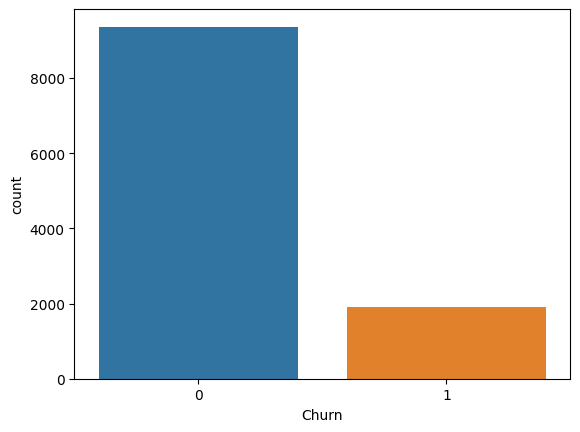

In [ ]:
sns.countplot(data=df,x="Churn")
print(df["Churn"].value_counts())
df["Churn"].value_counts(normalize=True)

**Observations:**
* 9364 customers stay with the service(83%)
* 1896(17%) customers in the dataset leave the service.

### City_Tier

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64


1.0    0.651507
3.0    0.305436
2.0    0.043057
Name: City_Tier, dtype: float64

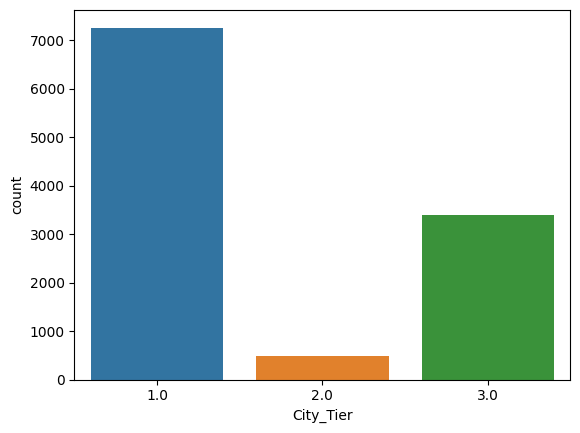

In [ ]:
sns.countplot(data=df,x="City_Tier")
print(df["City_Tier"].value_counts())
df["City_Tier"].value_counts(normalize=True)

**Observations:**
* 65% of customers live in tier 1. 
* 30% of customers live in tier 2.
* 4% of customers live in tier 3.

### Tenure

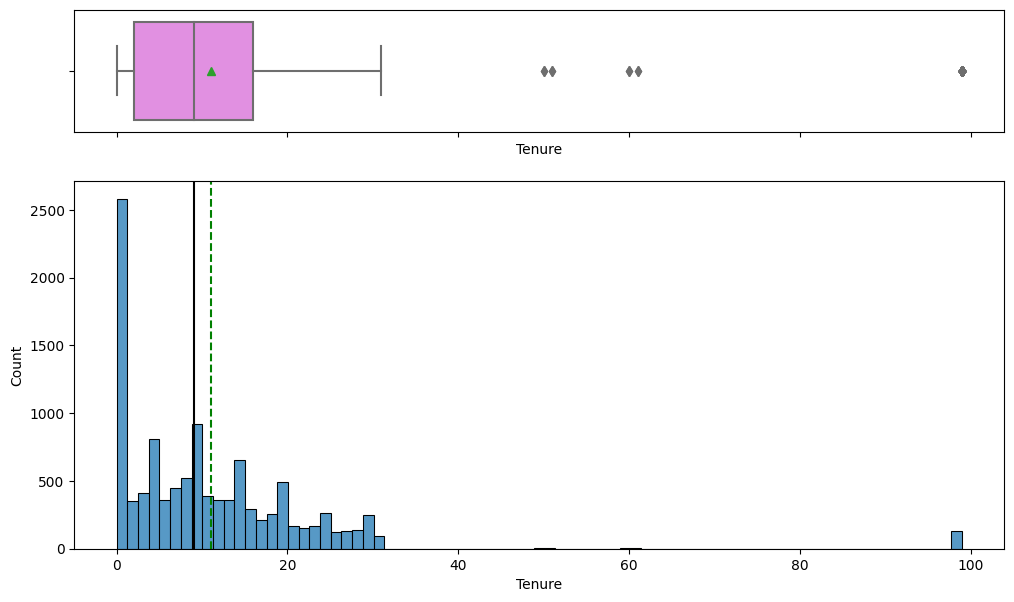

In [ ]:
histogram_boxplot(df, "Tenure")

**Observations:**
* The mode for tenure is zero.
* The distribution of tenure is skewed to the right.
* There appear to be outliers with a tenure greater than 40, which may require further investigation to assess their validity.

### CC_Contacted_LY

16.0


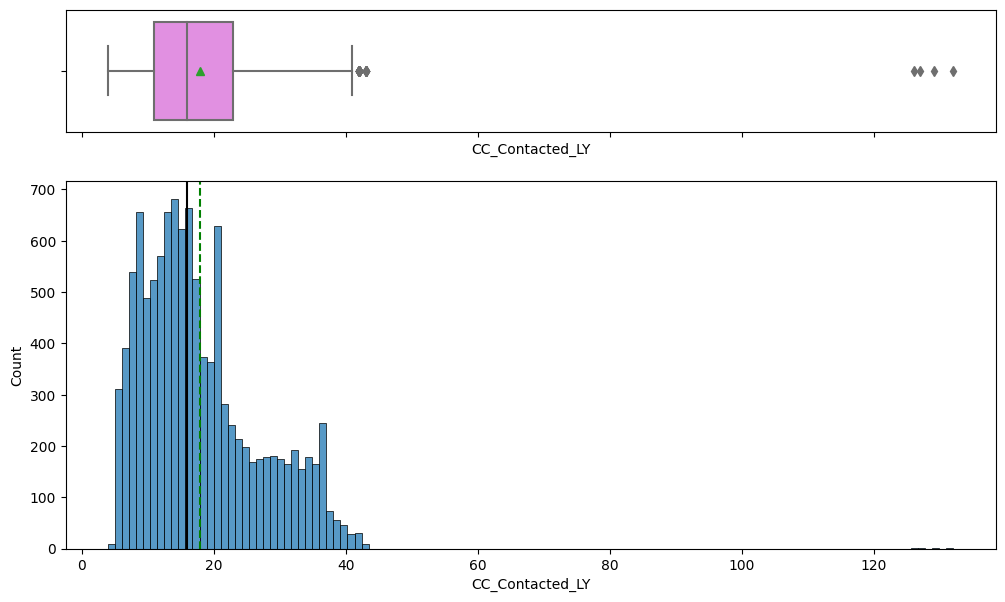

In [ ]:
histogram_boxplot(df, "CC_Contacted_LY")
print(df["CC_Contacted_LY"].median())

**Observations:**
* The data distribution of "CC_Contacted_LY" is skewed to the right, indicating that a few accounts have contacted customer services significantly more frequently than the others. 
* The median number of times that members of an account contacted customer services is 16.
* There are four outliers with the number of customer support contacts greater than 120. These outliers are suspicious and require further investigation to assess the validity of these data points.

### Service_Score

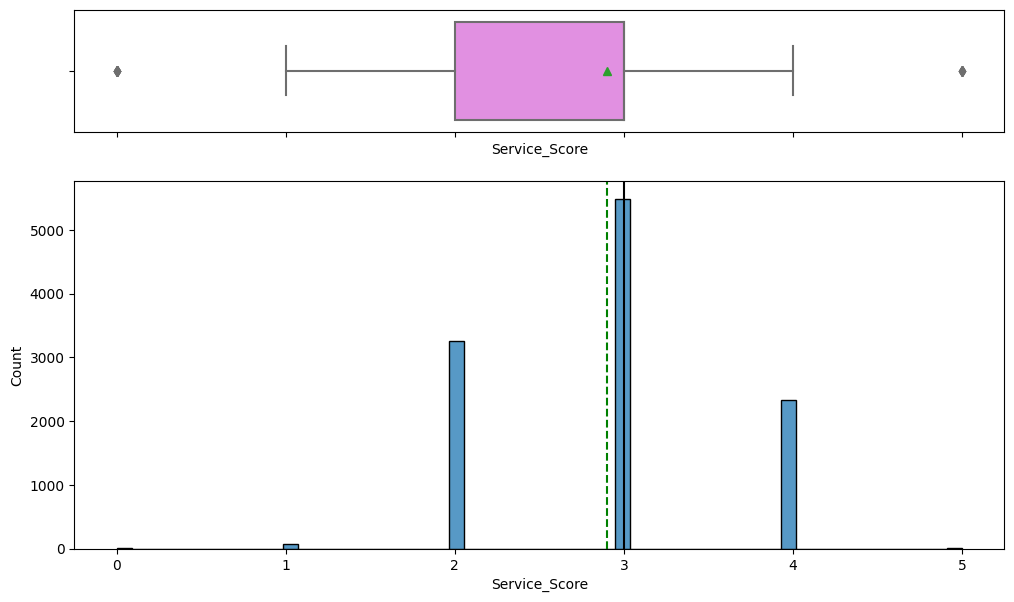

In [ ]:
histogram_boxplot(df, "Service_Score")


**Observations:**
* The distribution of Service Score is normally distributed.
* The median is 3. 
* There are outliers with values of 0 and 5.

### Account_user_count

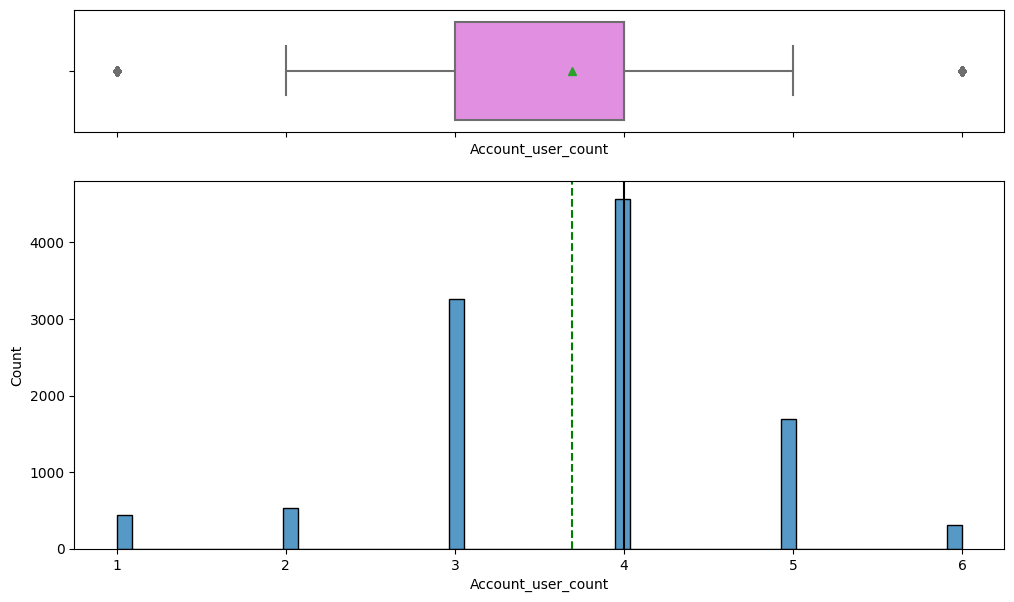

In [ ]:
histogram_boxplot(df, "Account_user_count")

**Observations:**
* The values of Account_user_count follow a normal distribution.
* There are some outliers above and below the whiskers, but they appear to be reasonable and valid values.

### CC_Agent_Score

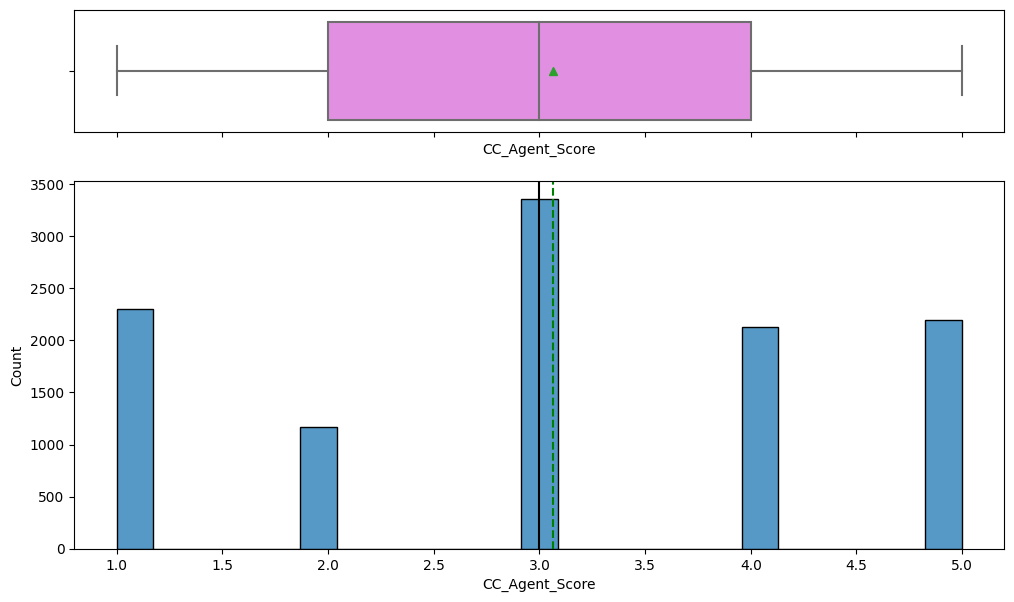

In [ ]:
histogram_boxplot(df, "CC_Agent_Score")

**Observations:**
* The median CC_Agent_Score is 3.
* The distribution has not outliers.

### rev_per_month

5.0


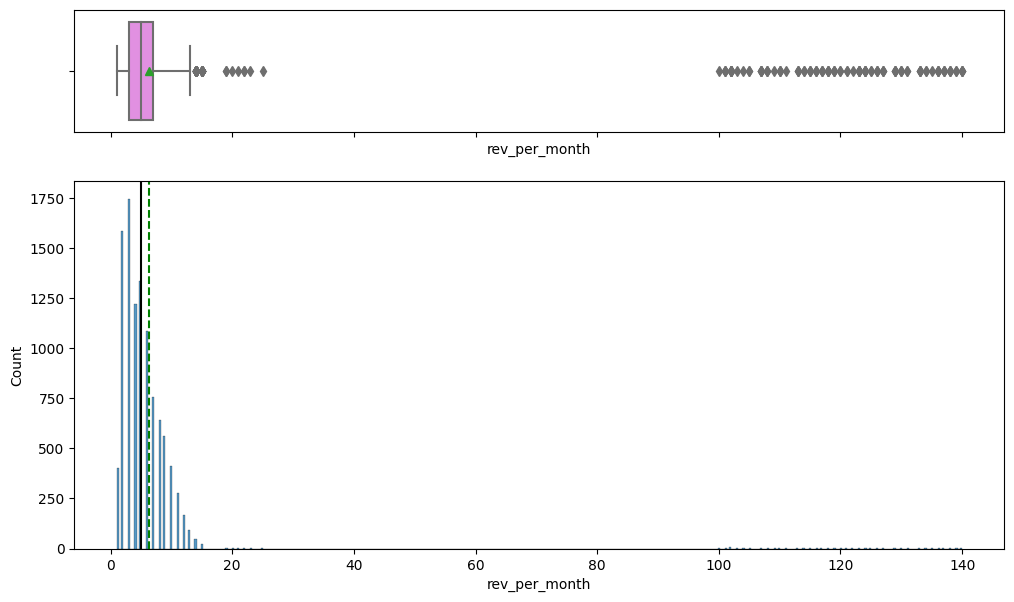

In [ ]:
histogram_boxplot(df, "rev_per_month")
print(df["rev_per_month"].median())

**Observations:**
* The distribution for rev_per_month demonstrates a right skew.
* The median rev_per_month is 5.
* Multiple outliers are greater than 100. 

### coupon_used_for_payment

1.0


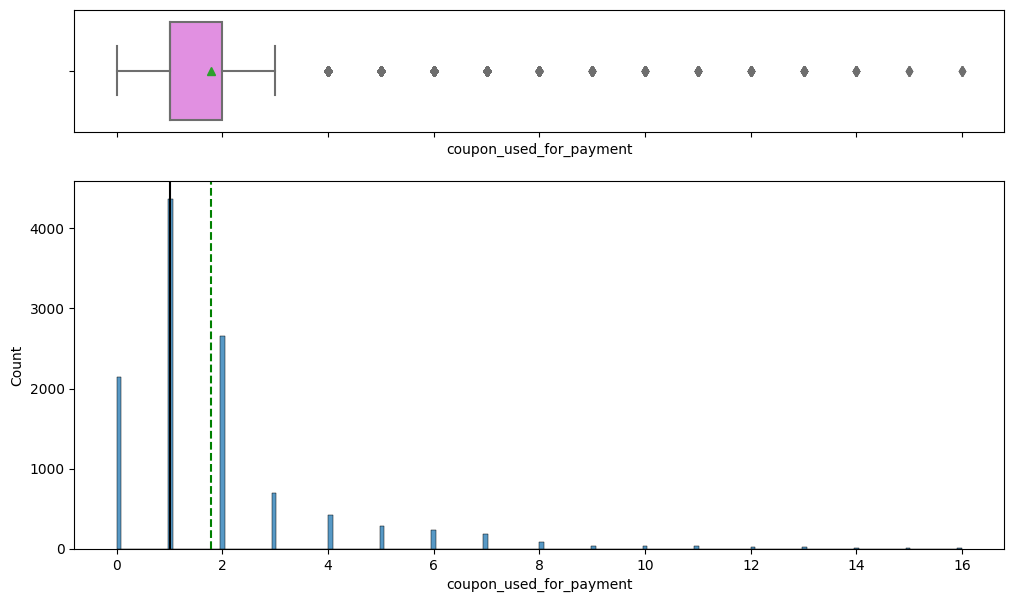

In [ ]:
histogram_boxplot(df, "coupon_used_for_payment")
print(df["coupon_used_for_payment"].median())

**Observations:**
* The distribution for coupon_used_for_payment has a right skew. 
* The median coupon use is 1.
* There a multiple outliers greater than the whisker.

### Day_Since_CC_connect

3.0


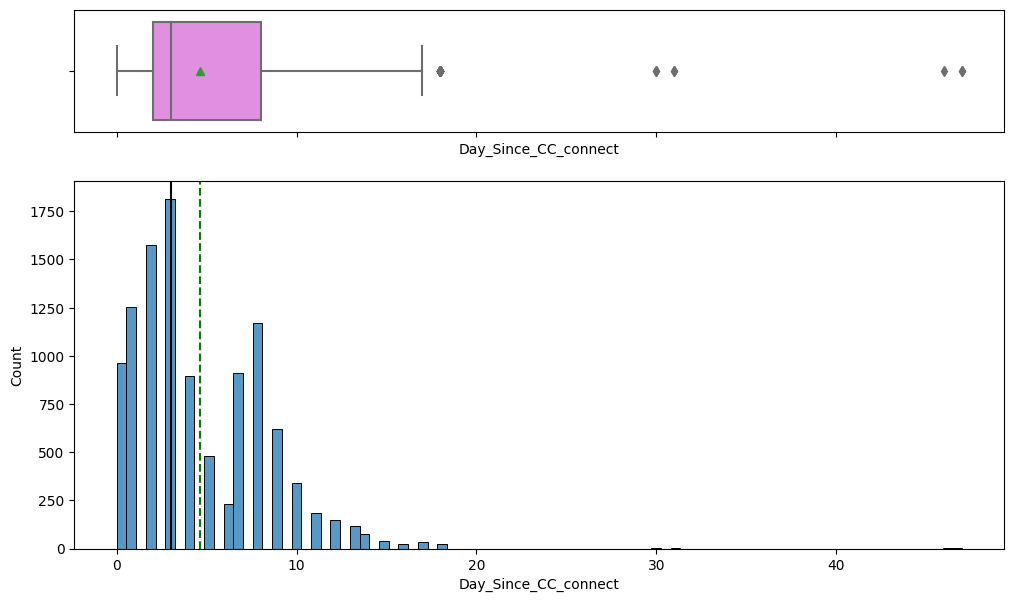

In [ ]:
histogram_boxplot(df, "Day_Since_CC_connect")
print(df["Day_Since_CC_connect"].median())

**Observations:**
* The distribution for Day_Since_CC_connect has a right skew. 
* The median days since a customer contacted customer care is 3.
* There a multiple outliers greater than the whisker.

### cashback

165.0


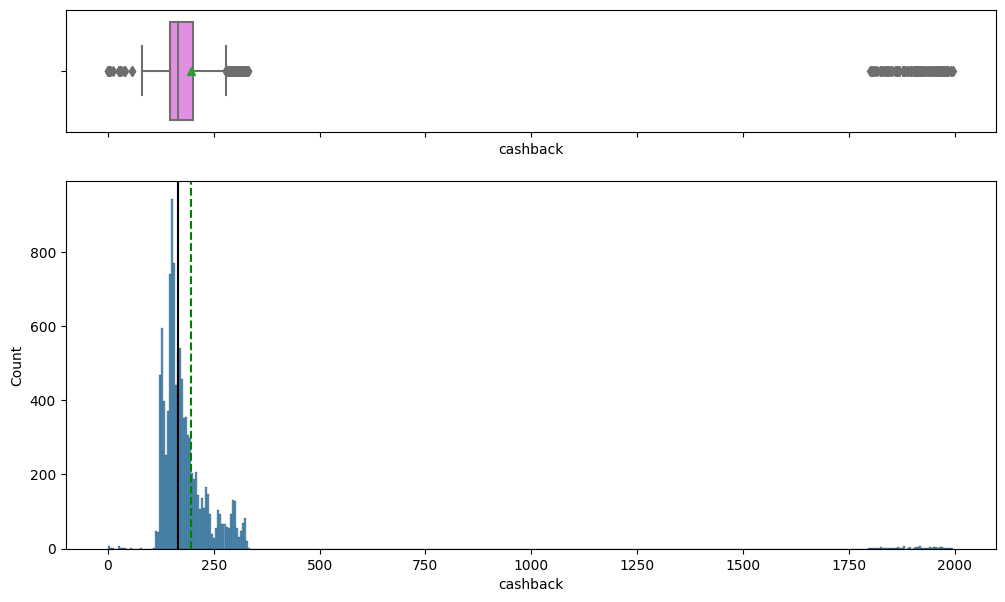

In [ ]:
histogram_boxplot(df, "cashback")
print(df["cashback"].median())

**Observations:**
* The distribution of cashback is right-skewed, with multiple outliers located both below the lower whisker and above the upper whisker. 
* There are two distinct groups, with one group located just above the upper whisker at around 250, and the other group located above 1775.

### Payment

<Axes: xlabel='Payment', ylabel='count'>

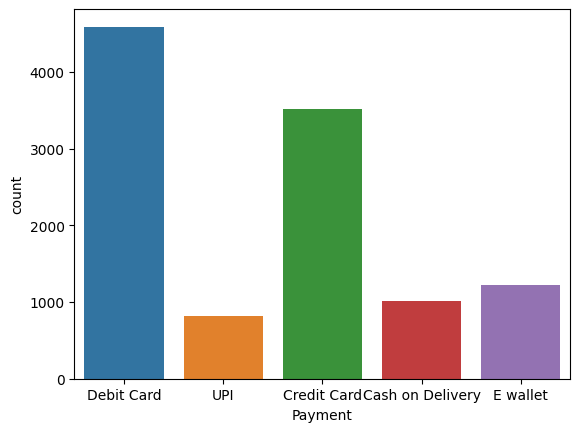

In [ ]:
sns.countplot(data = df,x = "Payment")

**Observations:**
* Debt Card and Credit Card lead the payment methods. 

### Complain_ly

<Axes: xlabel='Complain_ly', ylabel='count'>

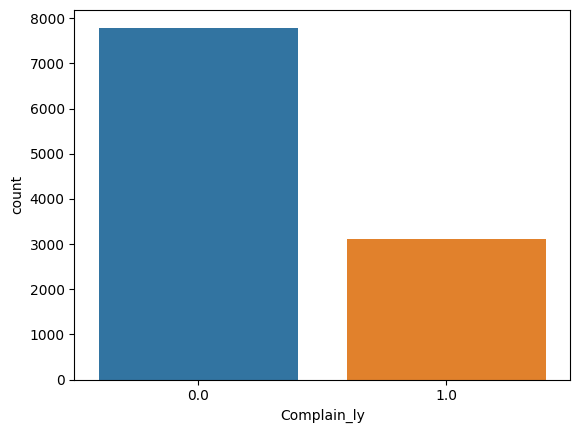

In [ ]:
sns.countplot(data = df,x = "Complain_ly")

**Observations:**
* Less than a third of all accounts have filed a complain.

### Gender

<Axes: xlabel='Gender', ylabel='count'>

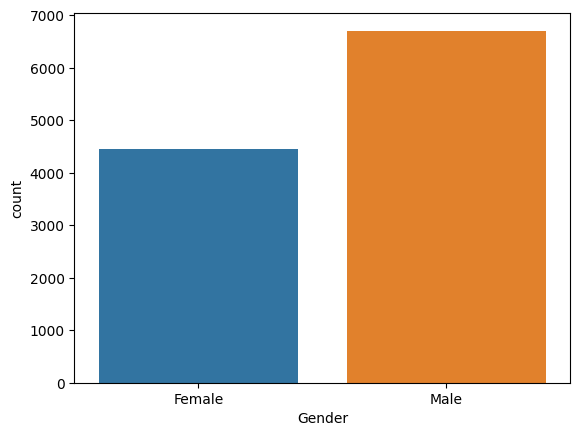

In [ ]:
sns.countplot(data=df,x="Gender")

**Observation:**


### account_segment

<Axes: xlabel='account_segment', ylabel='count'>

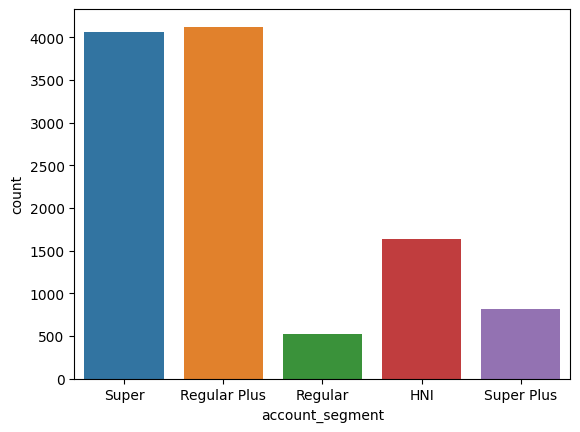

In [ ]:
sns.countplot(data=df,x="account_segment")

**Observations:**
* Most accounts are Super and Regular Plus.

### Marital_Status

<Axes: xlabel='Marital_Status', ylabel='count'>

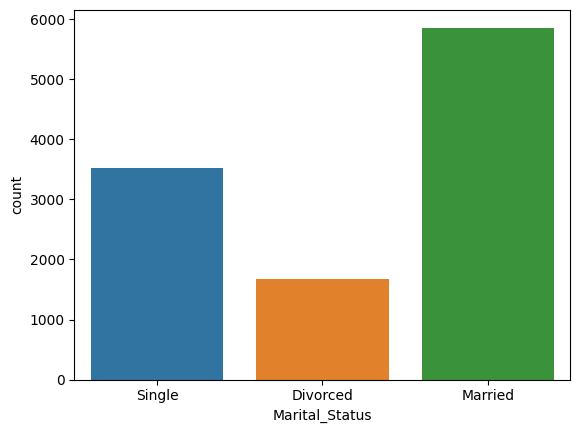

In [ ]:
sns.countplot(data=df, x= "Marital_Status")

### Login Device

<Axes: xlabel='Login_device', ylabel='count'>

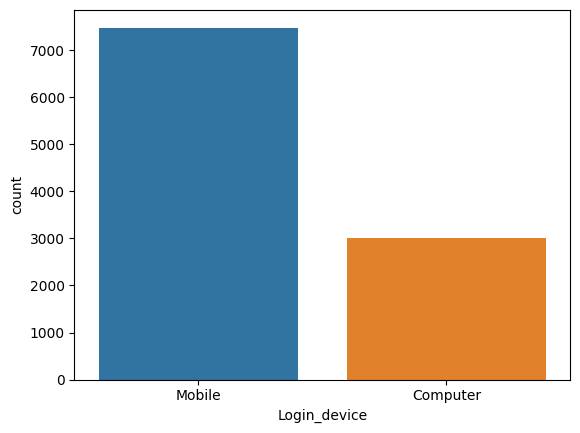

In [ ]:
sns.countplot(data=df, x= "Login_device")

## Bivariate Analysis

### Heatmap

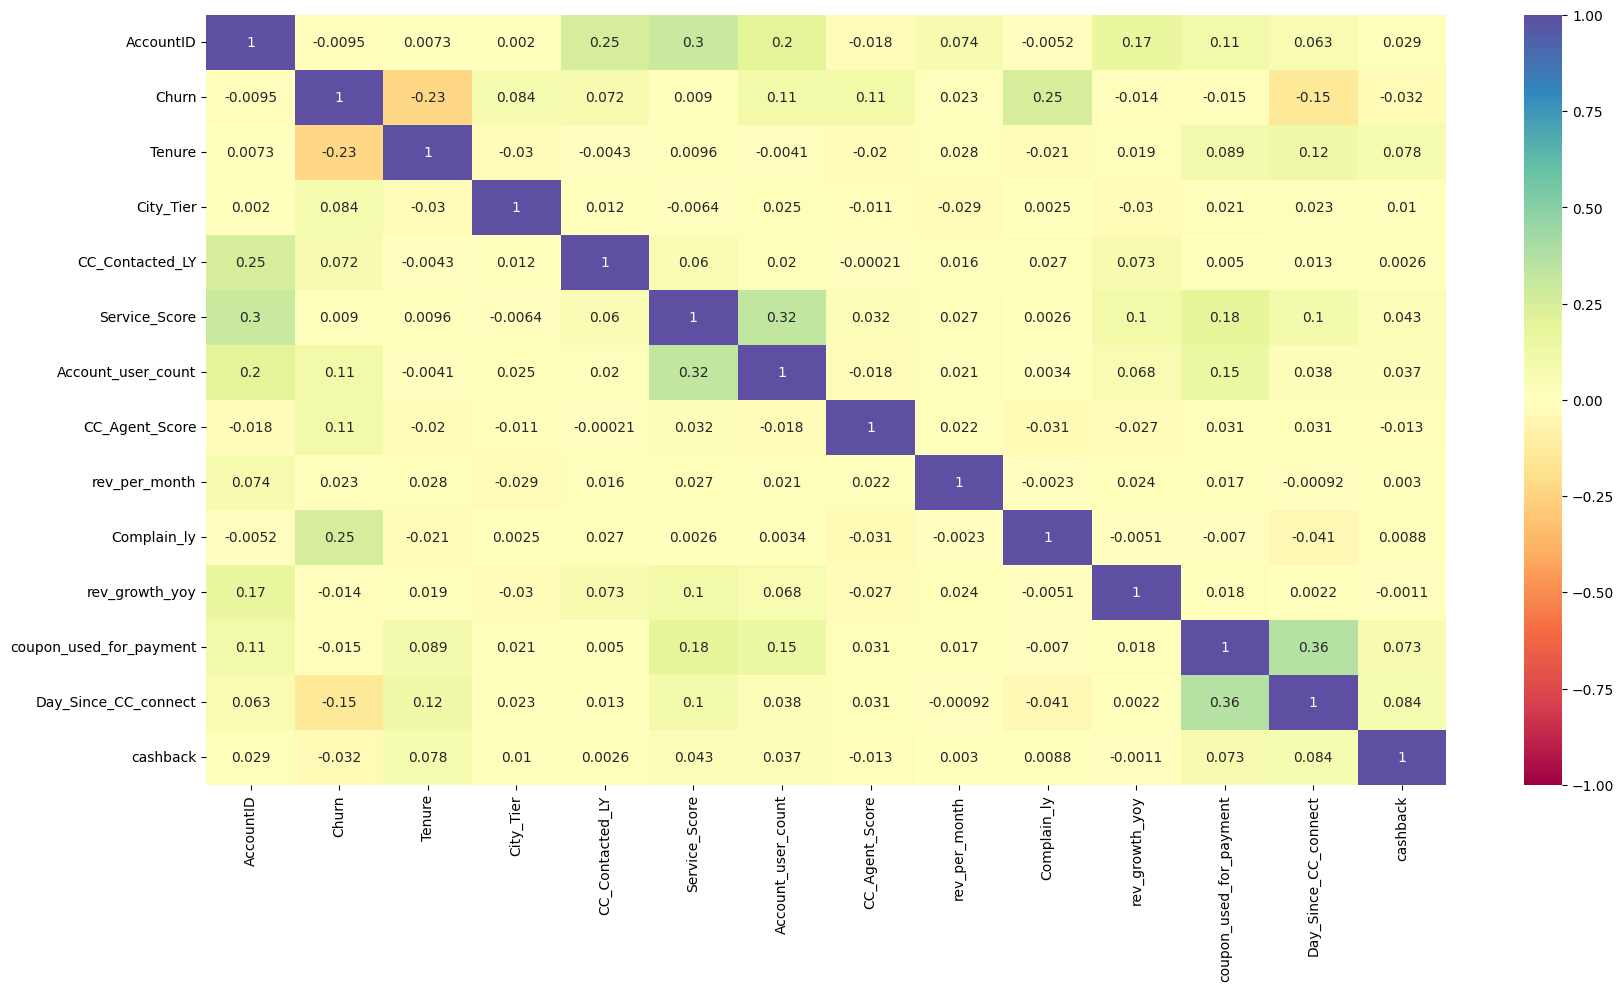

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observations:**
* There are no predictors variables which are strongly correlated with churn.
* There are no two predictor variables which strongly correlated.

### City_Tier vs Churn

Churn         0     1    All
City_Tier                   
All        9269  1879  11148
1.0        6207  1056   7263
3.0        2678   727   3405
2.0         384    96    480
------------------------------------------------------------------------------------------------------------------------


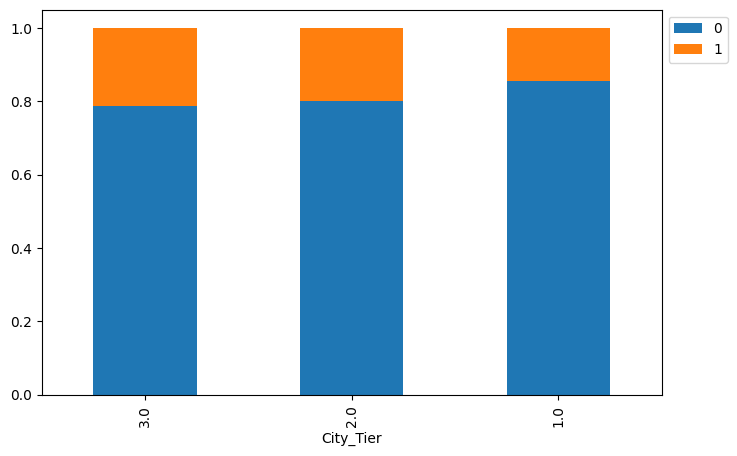

In [ ]:
# distribution_plot_wrt_target(df, "City_Tier", "Churn")
stacked_barplot(df, "City_Tier", "Churn")

**Observations:**
* Tier 1 cities experience marginally lower churn rates at 15%, compared to 19% in Tier 2 cities and 21% in Tier 3 cities.

### Tenure vs. Churn

Churn      0     1    All
Tenure                   
All     9194  1848  11042
1        681   670   1351
0        562   669   1231
3        367    43    410
4        360    43    403
7        418    32    450
2        322    32    354
20       187    30    217
5        373    30    403
8        490    29    519
10       396    27    423
14       320    25    345
13       334    25    359
99       107    24    131
19       249    24    273
9        475    21    496
15       291    20    311
21       150    20    170
11       368    20    388
16       272    19    291
6        348    15    363
12       347    13    360
18       242    11    253
17       209     6    215
30       137     0    137
61         2     0      2
60         2     0      2
51         2     0      2
50         2     0      2
31        96     0     96
26       122     0    122
29       114     0    114
28       137     0    137
27       131     0    131
25       114     0    114
24       147     0    147
22       151

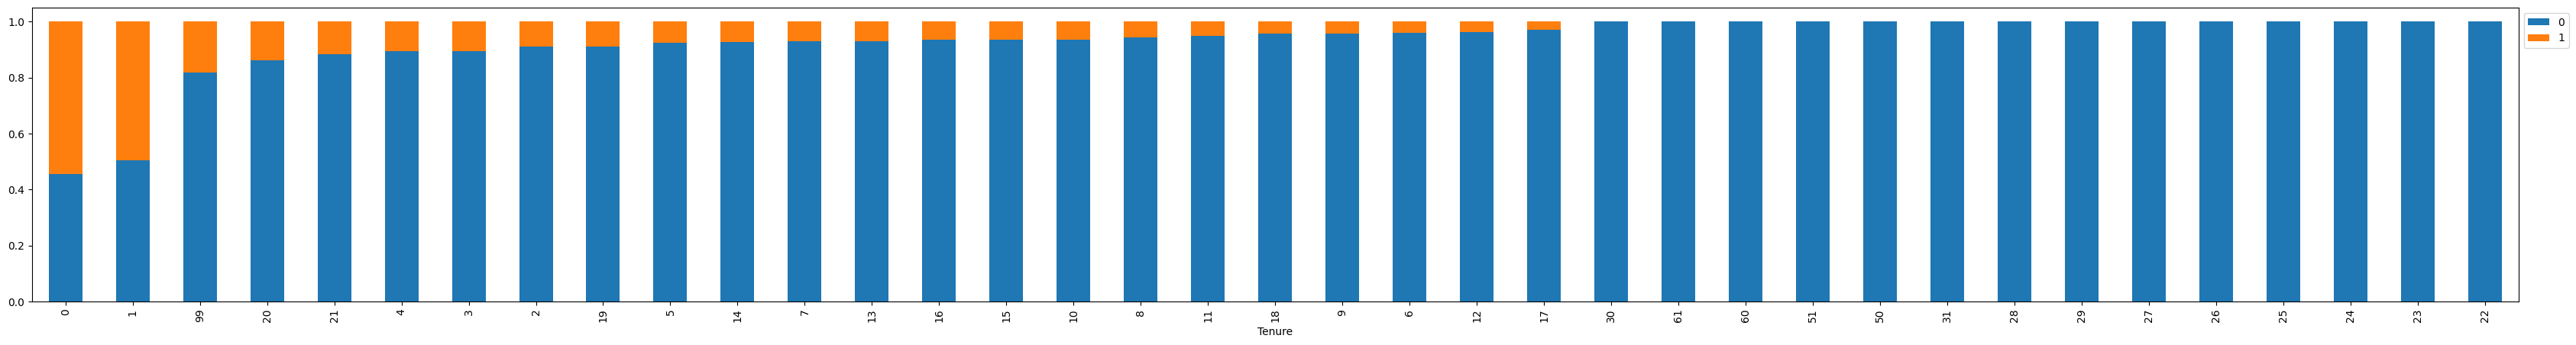

In [ ]:
stacked_barplot(df, "Tenure","Churn")

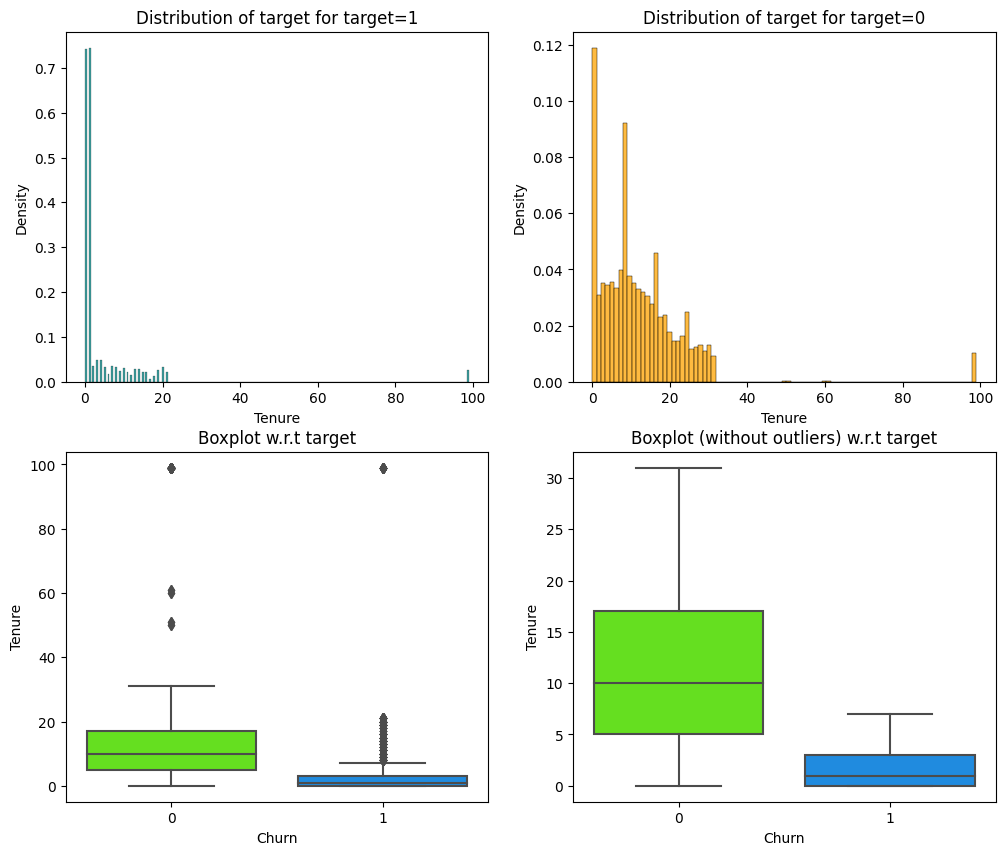

In [ ]:
distribution_plot_wrt_target(df, "Tenure", "Churn")

In [ ]:
# copy dataframe
copy_df = df.copy()

# Bin Tenure 
bins = [-1, 1, 100]
labels = ["< 2 years",">= 2 years"]
copy_df['BinnedTenure'] = pd.cut(copy_df['Tenure'], bins=bins, labels=labels)
copy_df

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,BinnedTenure
0,20000,1,4,3.0,6.0,0,0,3.0,3,0,2,0,9,1.0,11,1,5,160,0,>= 2 years
1,20001,1,0,1.0,8.0,1,1,3.0,4,1,3,0,7,1.0,15,0,0,121,0,< 2 years
2,20002,1,0,1.0,30.0,0,1,2.0,4,1,3,0,6,1.0,14,0,3,<NA>,0,< 2 years
3,20003,1,0,3.0,15.0,0,1,2.0,4,0,5,0,8,0.0,23,0,3,134,0,< 2 years
4,20004,1,0,1.0,12.0,2,1,2.0,3,1,5,0,3,0.0,11,1,3,130,0,< 2 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,31255,0,10,1.0,34.0,2,1,3.0,2,0,1,2,9,0.0,19,1,4,154,1,>= 2 years
11256,31256,0,13,1.0,19.0,2,1,3.0,5,3,5,2,7,0.0,16,1,8,227,0,>= 2 years
11257,31257,0,1,1.0,14.0,0,1,3.0,2,0,4,2,7,1.0,22,1,4,191,0,< 2 years
11258,31258,0,23,3.0,11.0,2,1,4.0,5,0,4,2,7,0.0,16,2,9,180,1,>= 2 years


In [ ]:
# create a contingency table
contingency_table = pd.crosstab(copy_df['BinnedTenure'], df['Churn'])

# calculate the odds ratio
oddsratio = odds_ratio(contingency_table)

oddsratio

OddsRatioResult(statistic=0.05945164361825783)

In [ ]:
print(1/0.05945164361825783)

16.82039282918826


In [ ]:
# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Compare p-value to significance level
print(p_value)

0.0


**Observation:**
* Customers with longer tenure are less likely to churn than new customers.
* Accounts with tenure less than two years are 16.8 times more likely to churn than older accounts.

### CC_Contacted_LY vs Churn

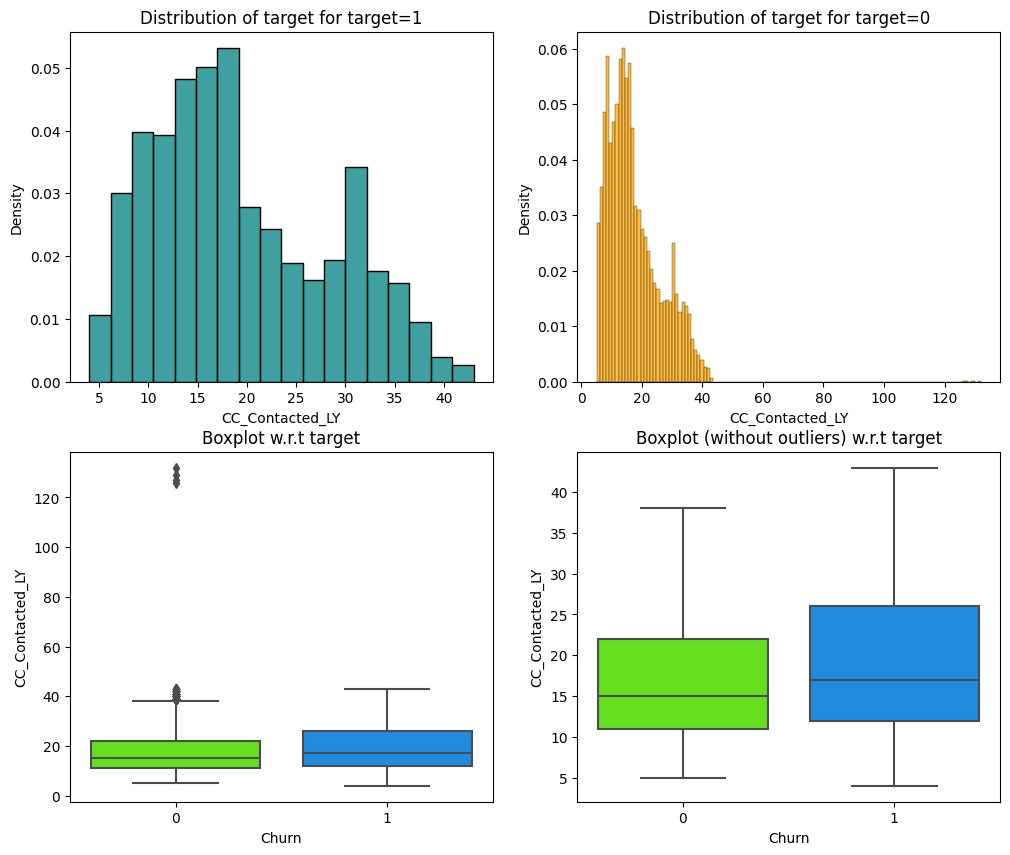

In [ ]:
distribution_plot_wrt_target(df, "CC_Contacted_LY", "Churn")

**Observations:**
* The frequency of interactions with customer care appears to be a weak indicator of potential churn.

### Service_Score vs. Churn

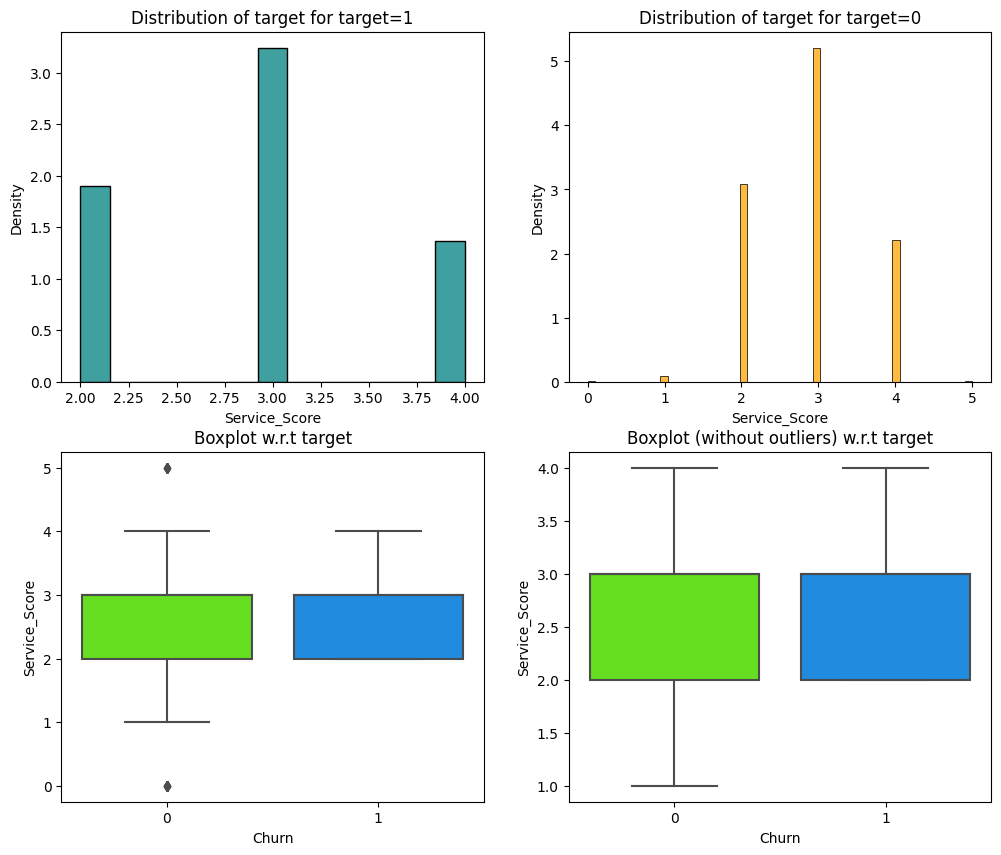

In [ ]:
distribution_plot_wrt_target(df, "Service_Score", "Churn")

**Observations:**
* The service score appears to be a weak indicator of potential churn.

### Account_user_count vs Churn

Churn                  0     1    All
Account_user_count                   
All                 8986  1830  10816
4                   3811   758   4569
3                   2772   489   3261
5                   1317   382   1699
6                    206   109    315
2                    478    48    526
1                    402    44    446
------------------------------------------------------------------------------------------------------------------------


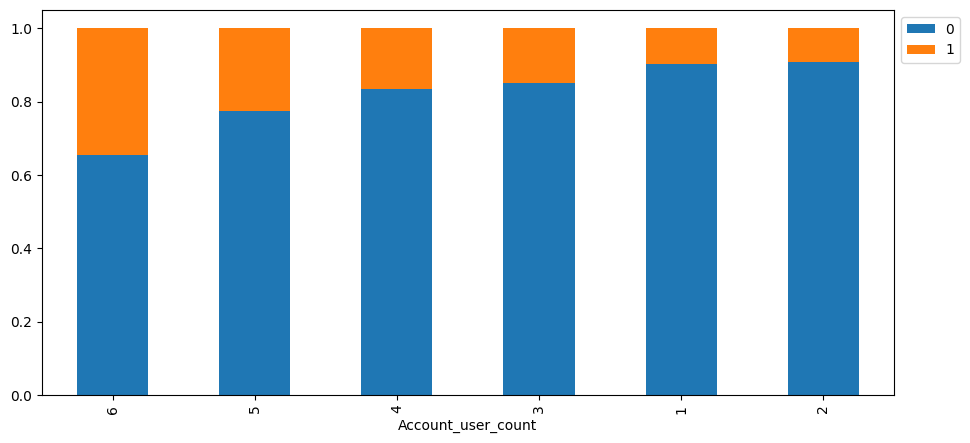

In [ ]:
stacked_barplot(df, "Account_user_count","Churn")

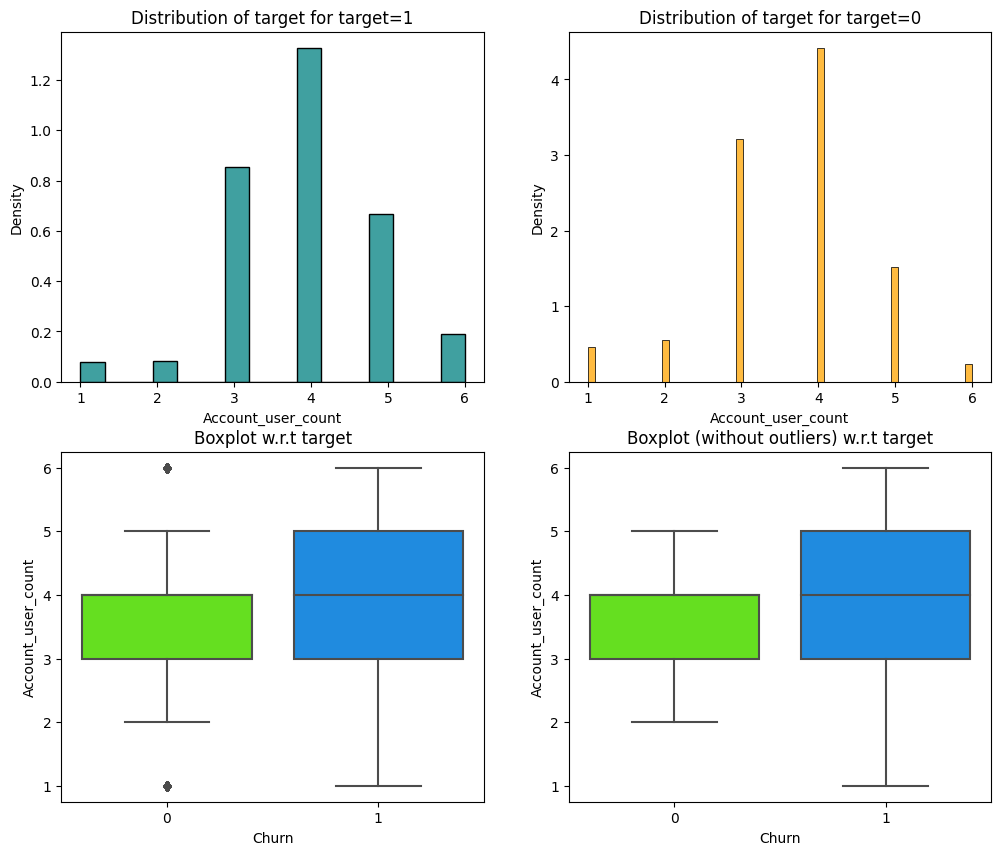

In [ ]:
distribution_plot_wrt_target(df, "Account_user_count", "Churn")

**Observations:**
* There is slightly higher churn with accounts with more members.

### CC_Agent_Score vs. Churn

Churn              0     1    All
CC_Agent_Score                   
All             9270  1874  11144
3               2783   577   3360
5               1669   522   2191
4               1763   364   2127
1               2038   264   2302
2               1017   147   1164
------------------------------------------------------------------------------------------------------------------------


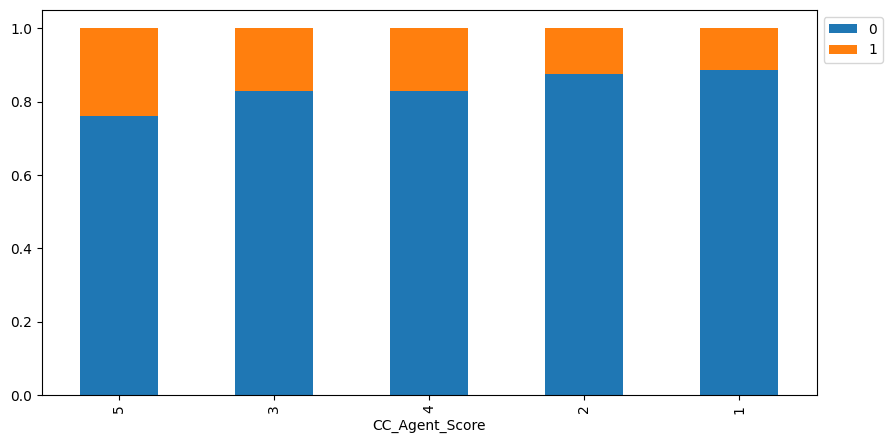

In [ ]:
stacked_barplot(df, "CC_Agent_Score","Churn")

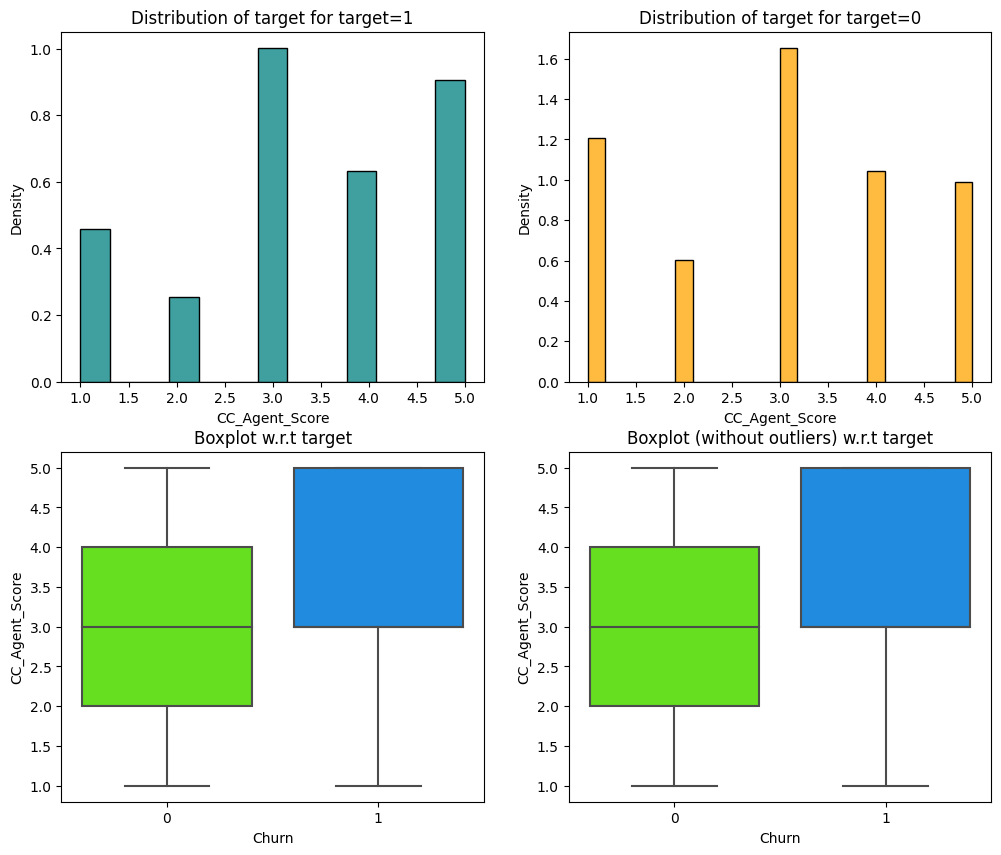

In [ ]:
distribution_plot_wrt_target(df, "CC_Agent_Score", "Churn")

**Observations:**
* Accounts with high satisfaction score are slightly likely to churn. 

### rev_per_month vs Churn

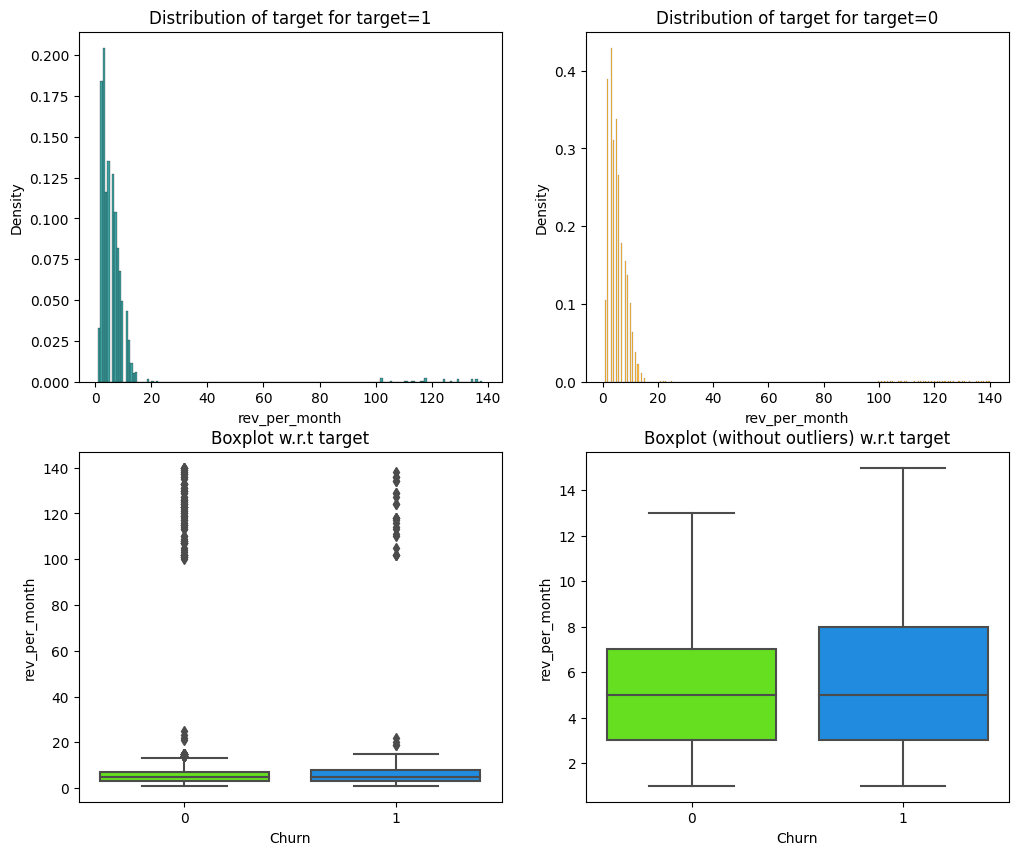

In [ ]:
distribution_plot_wrt_target(df, "rev_per_month", "Churn")

**Observations:**
* The monthly average revenue appears to be a weak indicator of potential churn.

### coupon_used_for_payment vs. Churn

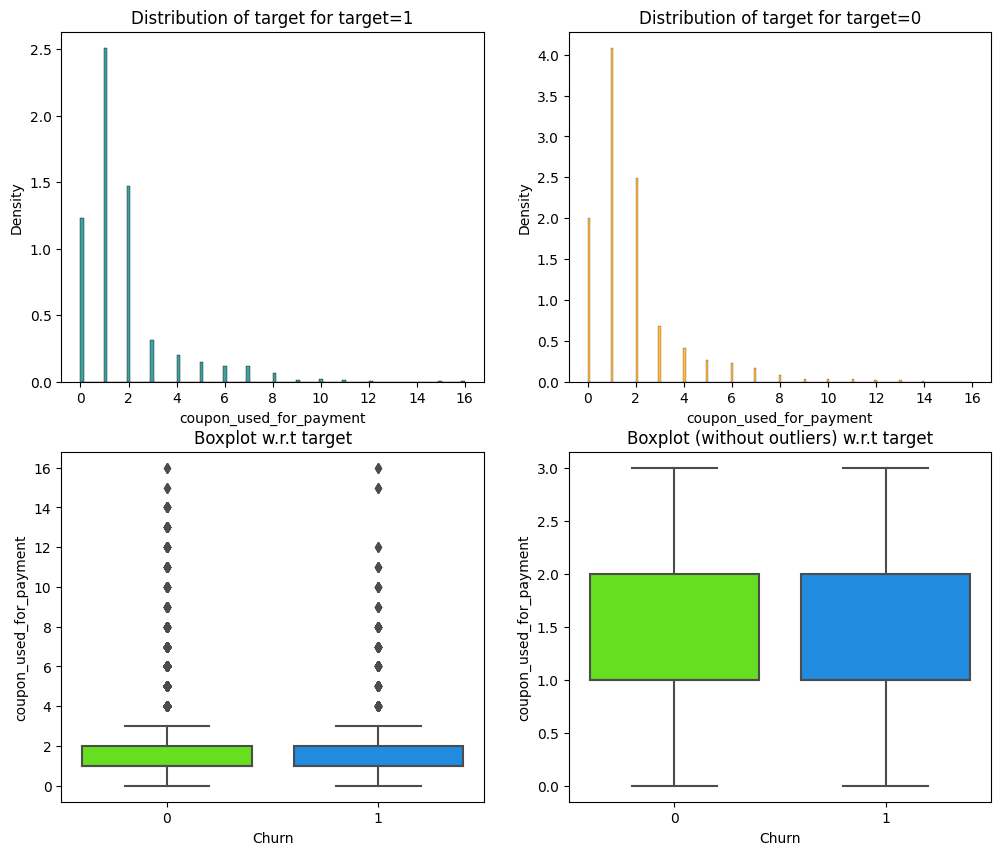

In [ ]:
distribution_plot_wrt_target(df, "coupon_used_for_payment", "Churn")

**Observation:**
* The coupons used for payment appears to be a weak indicator of potential churn.

### Day_Since_CC_connect vs. Churn

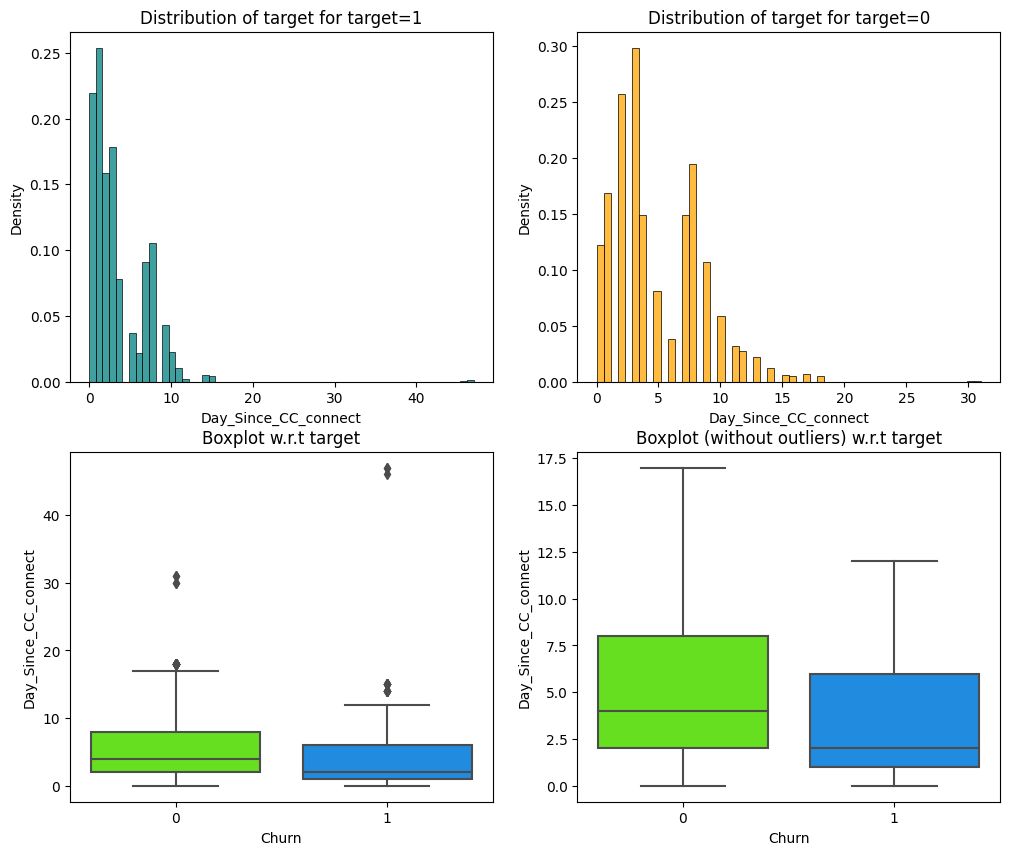

In [ ]:
distribution_plot_wrt_target(df, "Day_Since_CC_connect", "Churn")

**Observations:**
* Accounts with greater number of days between contact with the customer care have slightly less chance of churn.

### Cashback vs. Churn

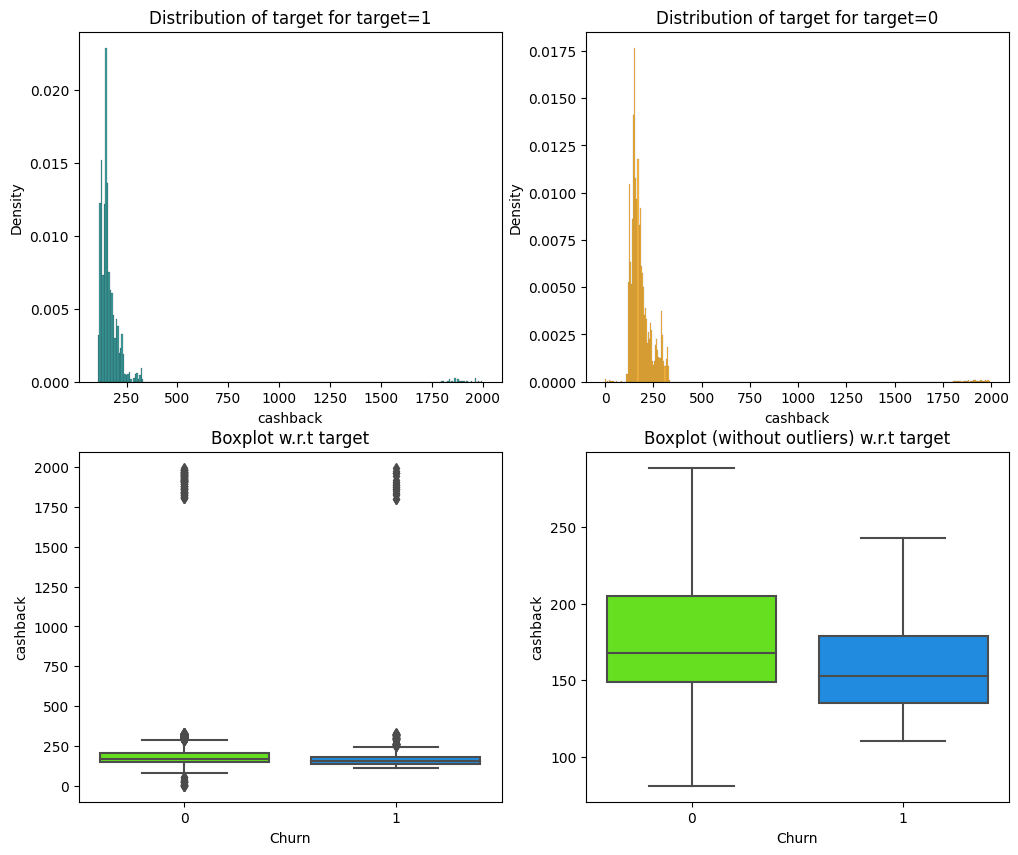

In [ ]:
distribution_plot_wrt_target(df, "cashback", "Churn")

**Observations:**
* Cashback is a weak indicator of churn.

### Payment vs. Churn

Churn                0     1    All
Payment                            
All               9277  1874  11151
Debit Card        3885   702   4587
Credit Card       3012   499   3511
E wallet           941   276   1217
Cash on Delivery   760   254   1014
UPI                679   143    822
------------------------------------------------------------------------------------------------------------------------


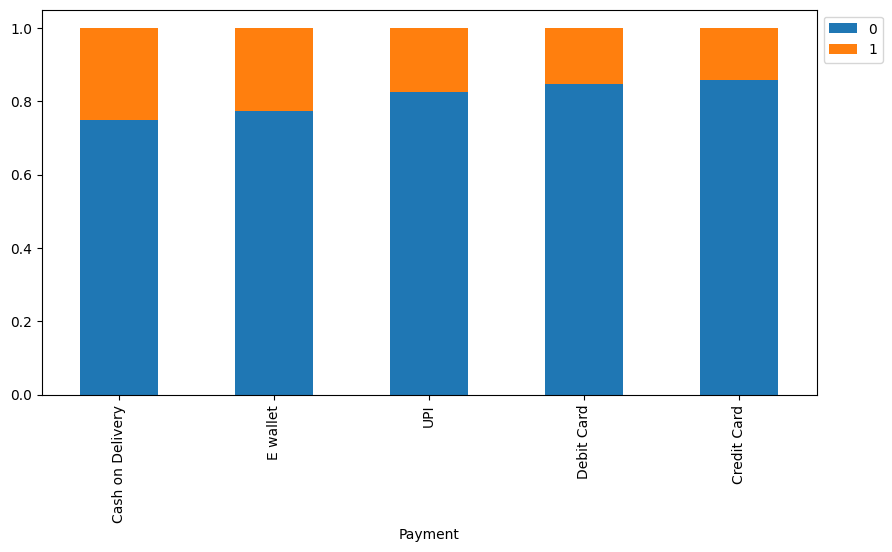

In [ ]:
stacked_barplot(df, "Payment","Churn")

**Observations:**
* Debit and credit card have the lowest churn.
* Cash on delivery and e wallet have the highest churn.

### Complain_ly vs Churn

In [ ]:
# create a contingency table
contingency_table = pd.crosstab(df['Complain_ly'], df['Churn'])

# calculate the odds ratio
oddsratio = odds_ratio(contingency_table)

oddsratio

OddsRatioResult(statistic=3.800225602873781)

In [ ]:
# Perform chi-square test of independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Compare p-value to significance level
print(p_value)

1.1662391608576675e-151


Churn           0     1    All
Complain_ly                   
All          9065  1838  10903
1.0          2123   988   3111
0.0          6942   850   7792
------------------------------------------------------------------------------------------------------------------------


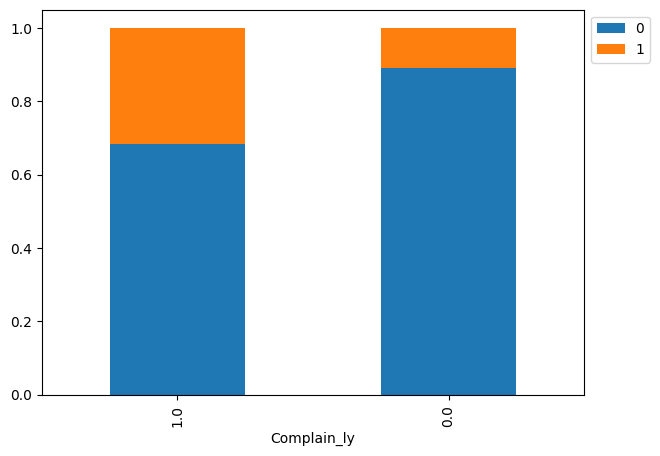

In [ ]:
stacked_barplot(df, "Complain_ly","Churn")

**Observations:**
* The churn rate was 31% for accounts that filed complaints, while the accounts that did not file complaints had a churn rate of 10%.
* Accounts that filed a complaint were 3.8 times more likely to churn than account that did not.

### Gender vs Churn

Churn      0     1    All
Gender                   
All     9278  1874  11152
Male    5519  1185   6704
Female  3759   689   4448
------------------------------------------------------------------------------------------------------------------------


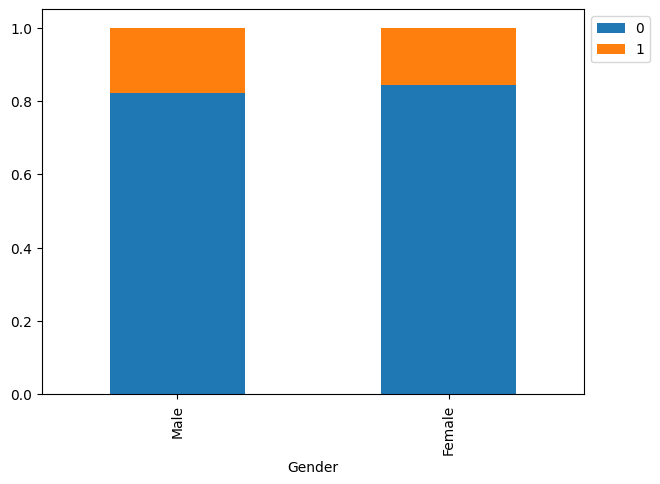

In [ ]:
stacked_barplot(df, "Gender","Churn")

**Observation:**
* Gender is a poor indicator of churn.

### account_segment vs Churn

Churn               0     1    All
account_segment                   
All              9285  1878  11163
Regular Plus     2997  1127   4124
Super            3646   416   4062
HNI              1384   255   1639
Regular           480    40    520
Super Plus        778    40    818
------------------------------------------------------------------------------------------------------------------------


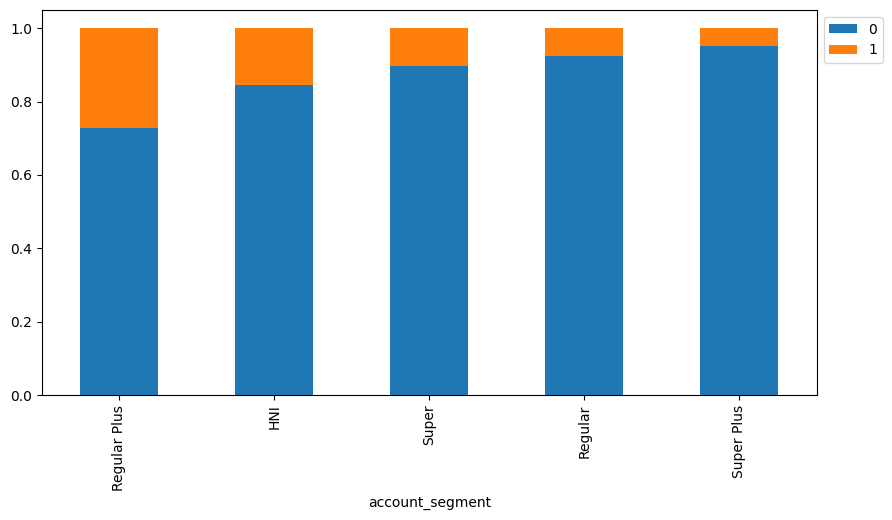

In [ ]:
stacked_barplot(df,"account_segment","Churn")

**Observations:**
* Regular Plus has the greatest churn(27%) followed by HNI(15%).
* Regular(7%) and Super Plus(5%) had the lowest churn.

### Marital_Status vs Churn

Churn              0     1    All
Marital_Status                   
All             9184  1864  11048
Single          2573   947   3520
Married         5187   673   5860
Divorced        1424   244   1668
------------------------------------------------------------------------------------------------------------------------


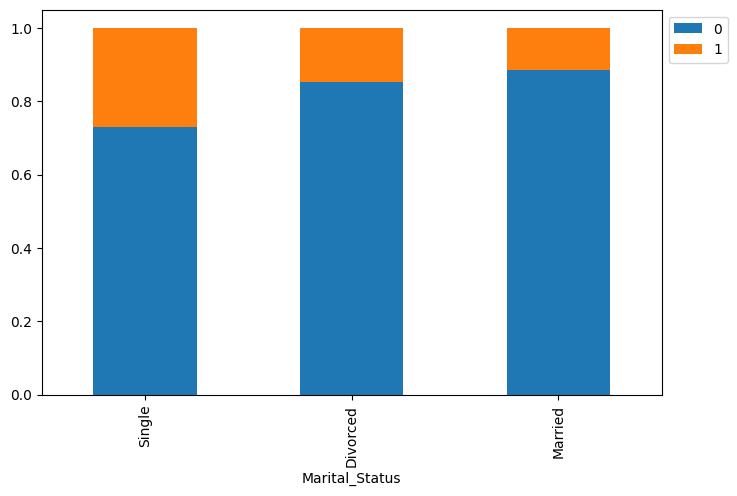

In [ ]:
stacked_barplot(df,"Marital_Status","Churn")

**Observations:**
* Accounts of single holders had the greatest churn (27%).
* Accounts belonging to married holders had the least churn(11%).

# Data Preparation

## Outlier Treatment

* Outliers can be found in several predictor variables; however, they appear to valid values that should be considered in the modeling.

## Assign Numerical Values to Categorical Values

In [ ]:
# View all unique values for each categorical predictor
for col in df.select_dtypes(include=['category', 'object']).columns.tolist():
  print("\n"+ col)
  print(df[col].unique())


Payment
['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]

Gender
['Female' 'Male' nan]

account_segment
['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']

Marital_Status
['Single' 'Divorced' 'Married' nan]

Login_device
['Mobile' 'Computer' nan]


In [ ]:
# we need to pass numerical values for each catergorical column for KNN imputation so we will label encode them
payment = {'Debit Card':0,'UPI':1, "Credit Card":2, "Cash on Delivery":3, "E wallet":4}
df['Payment'] = df['Payment'].map(payment).astype('Int32')

gender = {"Female":0, "Male":1}
df['Gender'] = df['Gender'].map(gender).astype('Int32')

account = {"Super":0, "Regular Plus":1, "Regular":2, "HNI":3, "Super Plus":4}
df['account_segment'] = df['account_segment'].map(account).astype('Int32')

marital = {"Single":0, "Divorced":1, "Married":2}
df['Marital_Status'] = df['Marital_Status'].map(marital).astype('Int32')

device = {"Mobile":0, "Computer":1}
df["Login_device"] = df["Login_device"].map(device).astype("Int32")

## Split the data into train and text sets

In [ ]:
# Separate the predictor variables from the target variable
X = df.drop(['Churn'],axis=1)
y = df['Churn']

# Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7,stratify=y)

## Imputing Missing Values

In [ ]:
imputer = KNNImputer(n_neighbors=5)

#Fit and transform the train data
X_train=pd.DataFrame(imputer.fit_transform(X_train),columns=X_train.columns)

#Transform the test data 
X_test=pd.DataFrame(imputer.transform(X_test),columns=X_test.columns)



In [ ]:
X_train.shape

(7882, 18)

In [ ]:
y_train.shape


(7882,)

In [ ]:
#Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print('-'*30)
print(X_test.isna().sum())

AccountID                  0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64
------------------------------
AccountID                  0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0

In [ ]:
## Function to inverse the encoding
def inverse_mapping(x,y):
    inv_dict = {v: k for k, v in x.items()}
    X_train[y] = np.round(X_train[y]).map(inv_dict).astype('category')
    X_test[y] = np.round(X_test[y]).map(inv_dict).astype('category')

  

In [ ]:
# Revert columns to categorical columns containing strings
inverse_mapping(payment,"Payment")
inverse_mapping(gender,"Gender")
inverse_mapping(account,"account_segment")
inverse_mapping(marital,"Marital_Status")
inverse_mapping(device,"Login_device")

In [ ]:
# Confirm that all categorical values were reverted back to strings
cols = X_train.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Debit Card          3228
Credit Card         2506
E wallet             849
Cash on Delivery     708
UPI                  591
Name: Payment, dtype: int64
******************************
Male      4771
Female    3111
Name: Gender, dtype: int64
******************************
Regular Plus    2915
Super           2867
HNI             1141
Super Plus       589
Regular          370
Name: account_segment, dtype: int64
******************************
Married     4157
Single      2454
Divorced    1271
Name: Marital_Status, dtype: int64
******************************
Mobile      5674
Computer    2208
Name: Login_device, dtype: int64
******************************


In [ ]:
cols = X_test.select_dtypes(include=['object','category'])
for i in cols.columns:
    print(X_train[i].value_counts())
    print('*'*30)

Debit Card          3228
Credit Card         2506
E wallet             849
Cash on Delivery     708
UPI                  591
Name: Payment, dtype: int64
******************************
Male      4771
Female    3111
Name: Gender, dtype: int64
******************************
Regular Plus    2915
Super           2867
HNI             1141
Super Plus       589
Regular          370
Name: account_segment, dtype: int64
******************************
Married     4157
Single      2454
Divorced    1271
Name: Marital_Status, dtype: int64
******************************
Mobile      5674
Computer    2208
Name: Login_device, dtype: int64
******************************


## Set Dummy Variables

In [ ]:
X_train=pd.get_dummies(X_train,drop_first=True)
X_test=pd.get_dummies(X_test,drop_first=True)
print(X_train.shape, X_test.shape)

(7882, 25) (3378, 25)


## SMOTE

In [ ]:
df["Churn"].value_counts(normalize = True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

There is class imbalance in the target column as 17% of the entries experience churn. To address this, the Synthetic Minority Oversampling Technique is can be used to balance the classes by generating additional samples from the minority class."

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1327
Before OverSampling, count of label '0': 6555 

After OverSampling, count of label '1': 2622
After OverSampling, count of label '0': 6555 

After OverSampling, the shape of train_X: (9177, 25)
After OverSampling, the shape of train_y: (9177,) 



Random Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 1327
Before UnderSampling, counts of label '0': 6555 

After UnderSampling, counts of label '1': 1327
After UnderSampling, counts of label '0': 1327 

After UnderSampling, the shape of train_X: (2654, 25)
After UnderSampling, the shape of train_y: (2654,) 



# Building Models

## Model evaluation criterion

**Model can make wrong predictions as:**
1. Predicting an account will churn and the account does not churn
2. Predicting an account will not churn and the account churn

**Which case is more important?**
* Predicting that account will not churn and the account churns. 

**How to reduce False Negatives?**
* The service will want to maximize Recall. A high Recall value indicates few false negatives. Therefore focus should be on increasing Recall(minimizing the false negatives) so that the service can retain accounts at risk of churn.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
  

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
          },
        index=[0],
    )

    return df_perf

In [ ]:
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = model.score(train,train_y)
    test_acc = model.score(test,test_y)
    
    train_recall = metrics.recall_score(train_y,pred_train)
    test_recall = metrics.recall_score(test_y,pred_test)
    
    train_precision = metrics.precision_score(train_y,pred_train)
    test_precision = metrics.precision_score(test_y,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(train,train_y))
        print("Accuracy on test set : ",model.score(test,test_y))
        print("Recall on training set : ",metrics.recall_score(train_y,pred_train))
        print("Recall on test set : ",metrics.recall_score(test_y,pred_test))
        print("Precision on training set : ",metrics.precision_score(train_y,pred_train))
        print("Precision on test set : ",metrics.precision_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Defining scorer to be used for cross-validation and hyperparameter tuning

* We want to reduce false negatives and will try to maximize "Recall".
* To maximize Recall, we can use Recall as a scorer in cross-validation and hyperparameter tuning.

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score)

### Model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))




Cross-Validation performance on training dataset:

Logistic regression: 0.09573840261029934
Bagging: 0.7264690026954177
Random forest: 0.765634841821535
GBM: 0.5893147964250248
Adaboost: 0.5862930912186125
Xgboost: 0.8002695417789758
dtree: 0.7784281458362889


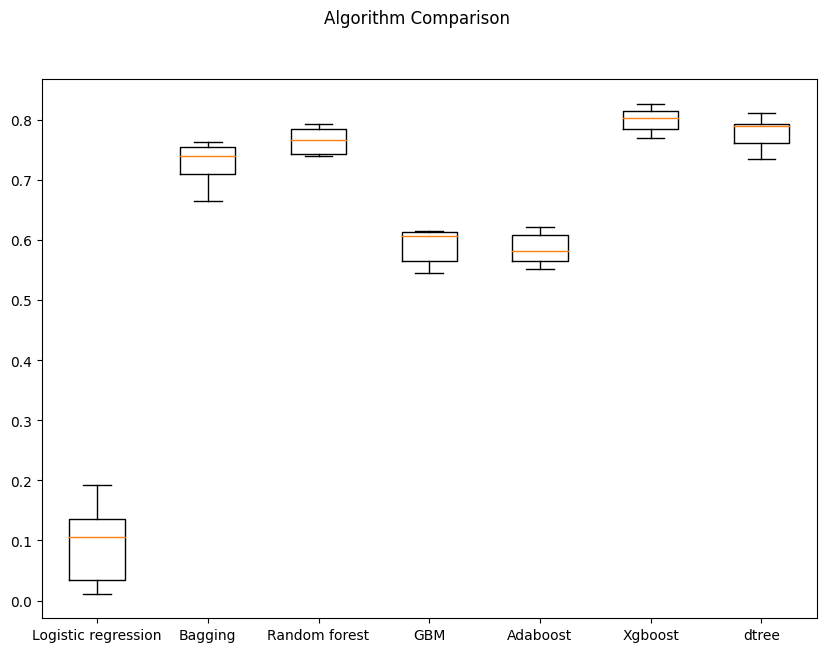

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* Among the seven prediction models, XGBoost, decision tree, and Random Forest exhibited the highest performance with scores of 0.80, 0.77, and 0.76, respectively.
* There was a variation of approximately 0.05 in the results across the five cross-validation tests for each model.


### Model Building with oversampled data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))




Cross-Validation performance on training dataset:

Logistic regression: 0.566358415121774
Bagging: 0.8352373682297347
Random forest: 0.8821555797891676
GBM: 0.7814678298800437
Adaboost: 0.785667030170847
Xgboost: 0.9096197746274083
dtree: 0.8348542348237004


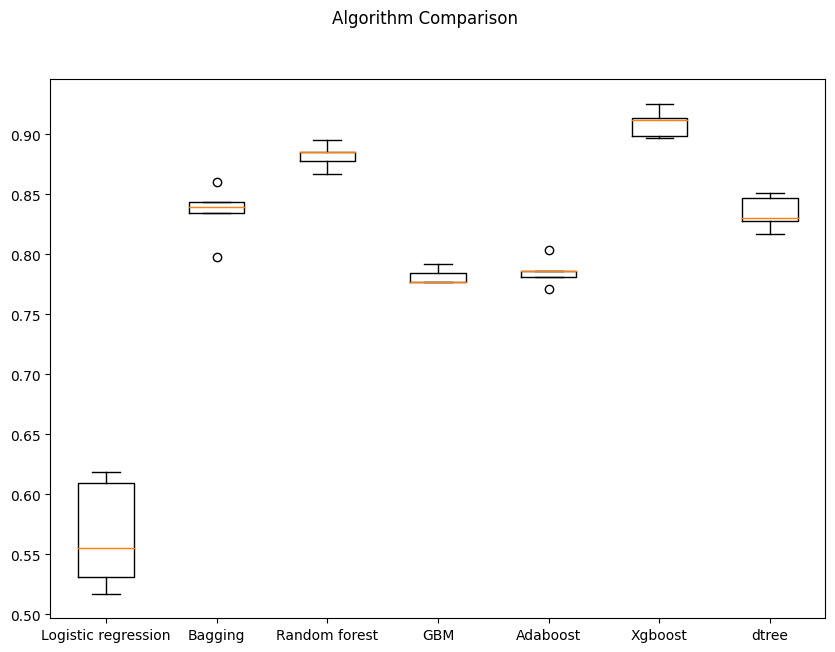

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* Out of the seven models evaluated on the oversampled dataset, the XGBoost model outperformed the others with a 91% accuracy rate in identifying churned accounts. Its performance was consistent across five cross-validation tests, with a variation of approximately 0.03. 
* The Random Forest and Bagging models also showed strong recall values, with 0.88 and 0.84, respectively.

### Model Building with Random Undersampling

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss",n_jobs=-1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))




Cross-Validation performance on training dataset:

Logistic regression: 0.7565782380479501
Bagging: 0.8711193077032204
Random forest: 0.9133238757270534
GBM: 0.8462703929635408
Adaboost: 0.8176337069087815
Xgboost: 0.9163257199602782
dtree: 0.8485033338062138


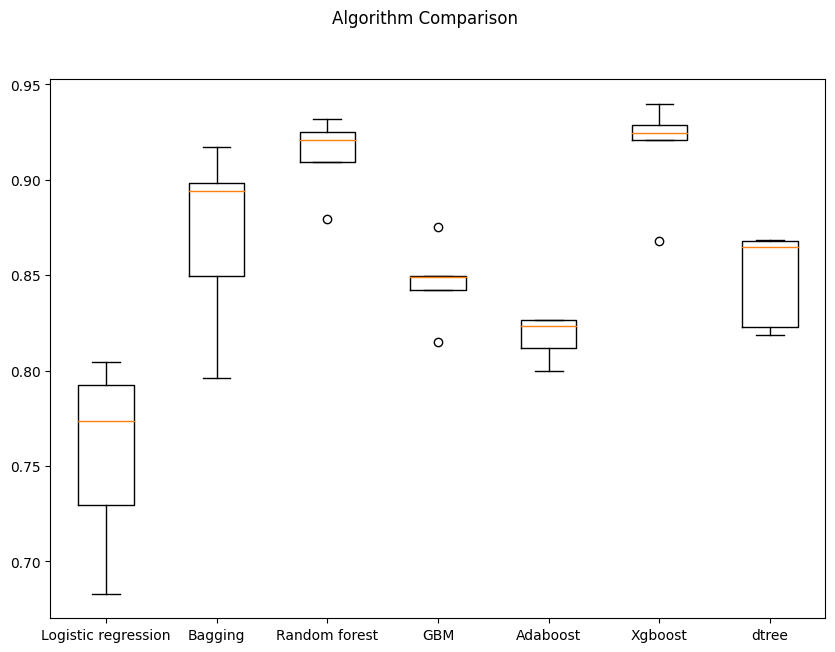

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observations:**
* The XGBoost and Random Forest models exhibited the highest performance on the undersampled data. With recall values exceeding 0.92 and minimal variance in cross-validation tests, both models proved to be robust and reliable.

**After looking at performance of all the models, I've selected models to further improve with hyperparameter tuning**

- Recall value is highest for the following models:
  - XGBoost on oversampled data and undersampled data.
  - Random Forest on undersampled data and oversampled data.
  - Bagging on undersampled data.



## Hyperparameter Tuning

### Tuning XGBoost using oversampled data

#### RandomSearch

In [ ]:
# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9766293091218612:


In [ ]:
xgb2 = XGBClassifier(subsample= 0.9, scale_pos_weight= 10, n_estimators= 150, learning_rate= 0.1, gamma= 5)

xgb2.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_un, y_train_un
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.938206,1.0,0.890007,0.941803


Accuracy on training set :  0.9382064807837227
Accuracy on test set :  0.8031379514505624
Recall on training set :  1.0
Recall on test set :  0.984182776801406
Precision on training set :  0.8900067069081153
Precision on test set :  0.4605263157894737


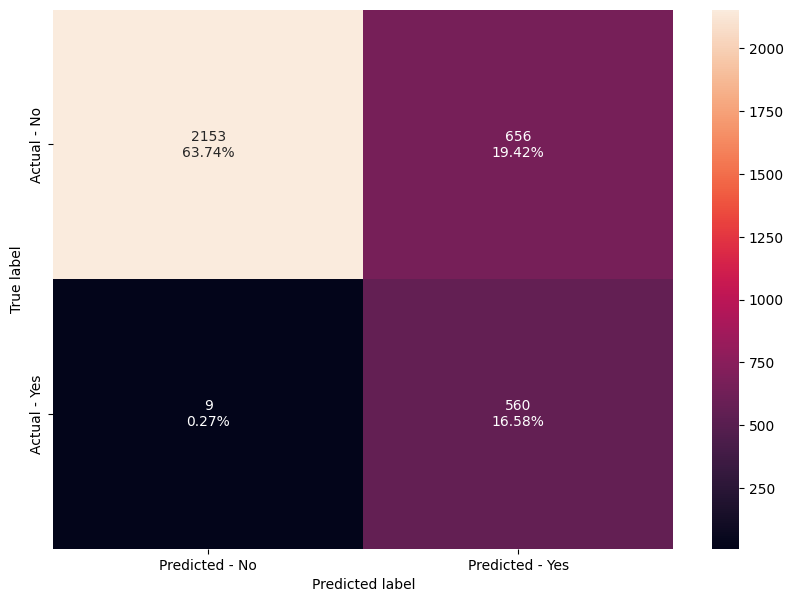

In [ ]:
# Calculating different metrics
get_metrics_score(xgb2,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(xgb2, y_test)

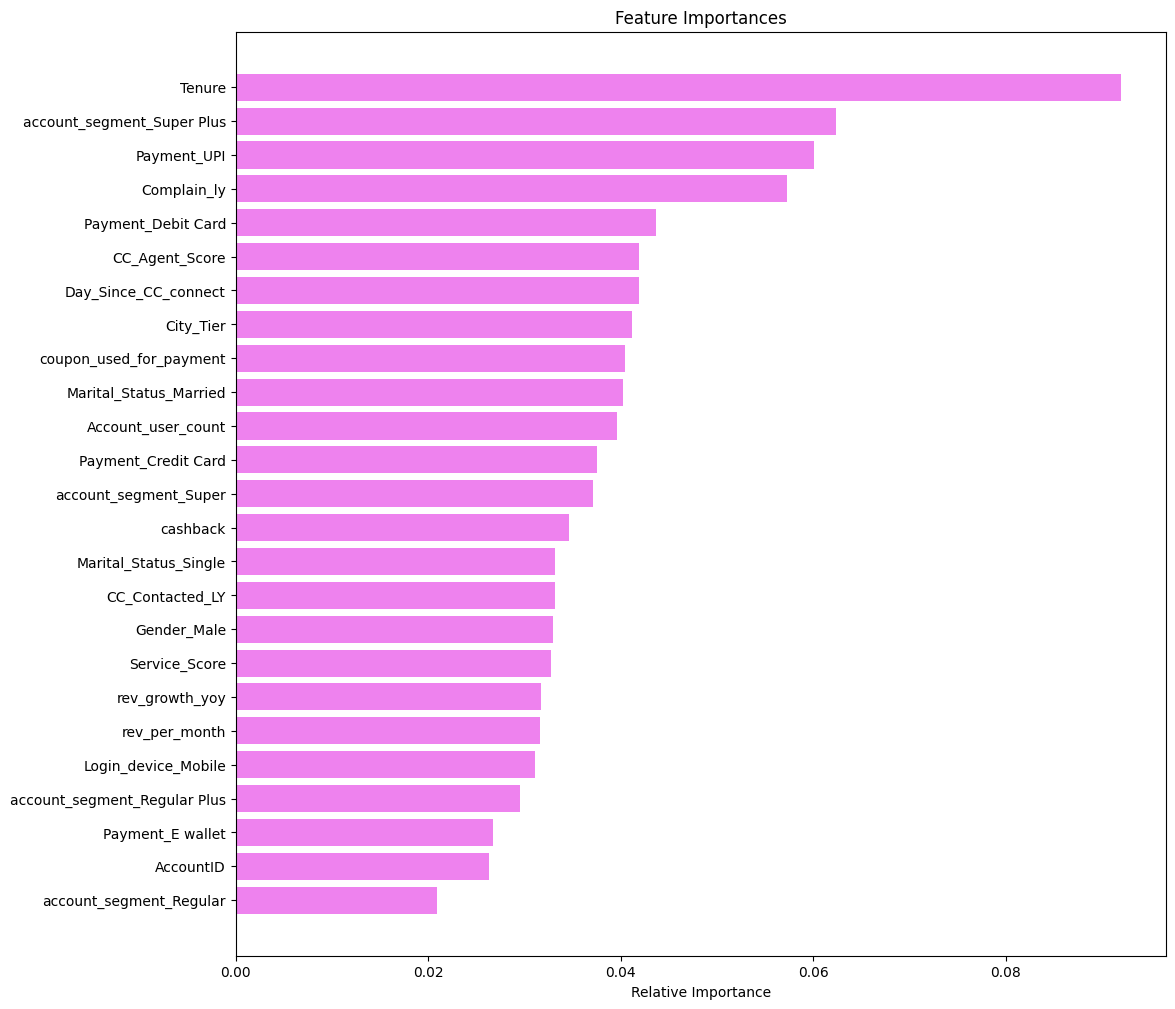

In [ ]:
feature_names = X_train.columns
importances = xgb2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* Although the tuned XGBoost model achieved a perfect fit on the train data, it appears to have overfitted. The recall score was 1.0 on the train data, suggesting that the model identified all true positives, but the recall on the test data was 0.98, indicating some degree of overfitting. 
* The model identified several factors, including tenure, account segments categorized as "Super Plus", payment using UPI, and complaints, as the most significant predictors of churn.

### Random Forest on Undersampled Data

#### RandomSearch

In [ ]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9042984820541922:
CPU times: user 2.28 s, sys: 96 ms, total: 2.38 s
Wall time: 1min 37s


In [ ]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(n_estimators= 300, min_samples_leaf= 1, max_samples= 0.6, max_features= 'sqrt')

tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=300)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.998493,0.999246,0.997743,0.998494


Accuracy on training set :  0.9984928409947249
Accuracy on test set :  0.9026050917702783
Recall on training set :  0.9992464204973625
Recall on test set :  0.9068541300527241
Precision on training set :  0.9977426636568849
Precision on test set :  0.6515151515151515


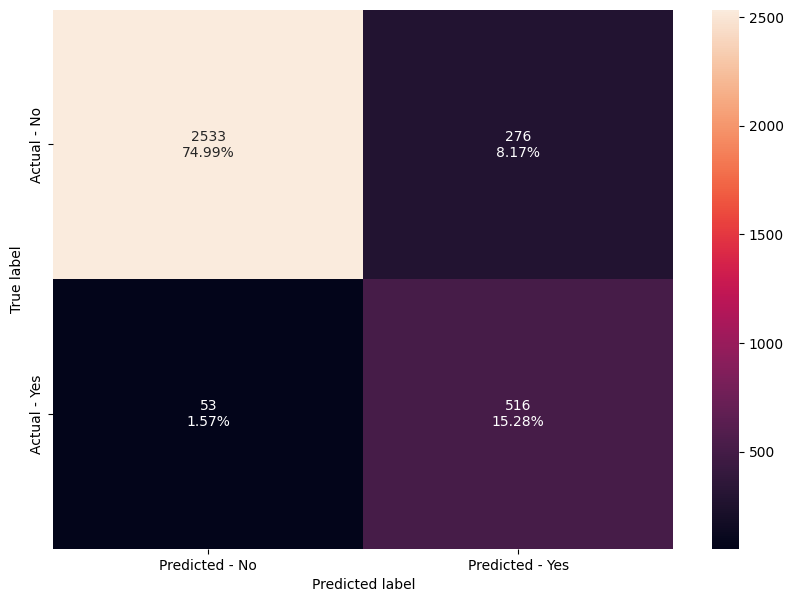

In [ ]:
# Calculating different metrics
get_metrics_score(tuned_rf2,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(tuned_rf2, y_test)

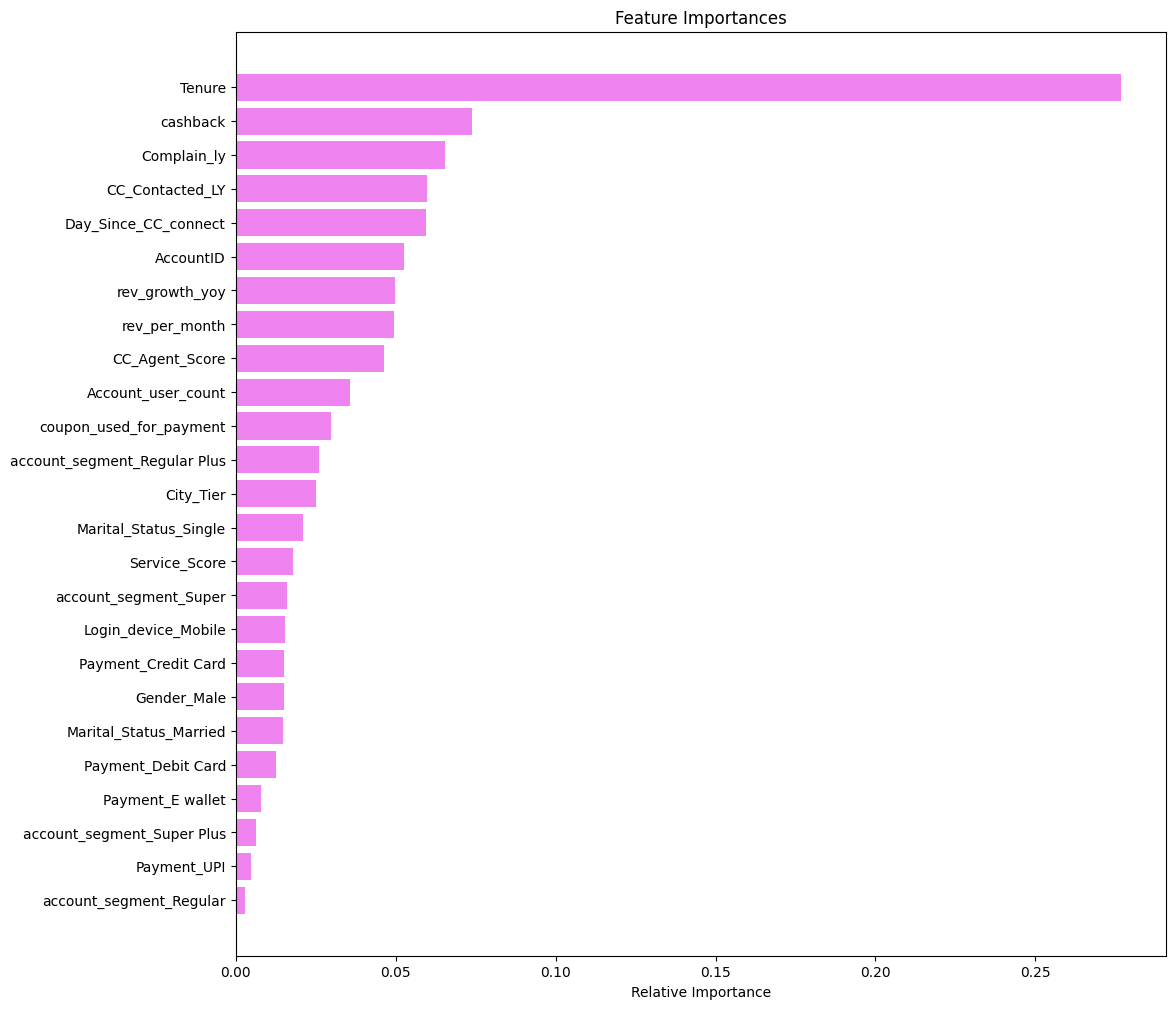

In [ ]:
feature_names = X_train.columns
importances = tuned_rf2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations:**
* The RandomForest model was able to predict churn with 100% accuracy on the train dataset, but it appeared to have overfit the data and did not generalize well to the test data.
* The model achieved a recall value of 0.999 on the train data but only 0.916 on the test data. This indicates that while the model was able to correctly identify almost all instances of churn in the train data, it struggled to do so on new, unseen data.
* The model identified tenure, cashback, and complain_ly as the most important predictors of churn.

### Bagging on Under sampled data

#### RandomSearch

In [ ]:
%%time

# Creating pipeline
pipe = make_pipeline( BaggingClassifier(random_state=1))

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'baggingclassifier__max_samples': [0.7,0.8,0.9,1], 
              'baggingclassifier__max_features': [0.7,0.8,0.9,1],
              'baggingclassifier__n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=pipe, param_distributions=param_grid, n_jobs = -1, n_iter=50, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'baggingclassifier__n_estimators': 50, 'baggingclassifier__max_samples': 0.9, 'baggingclassifier__max_features': 0.9} with CV score=0.7625989502057029:
CPU times: user 2.88 s, sys: 212 ms, total: 3.09 s
Wall time: 1min 36s


In [ ]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(max_features= 0.9, max_samples= 0.9, n_estimators= 50)

tuned_bag2.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50)

In [ ]:
tuned_bag2_perf = model_performance_classification_sklearn(
    tuned_bag2, X_train_un, y_train_un
)
tuned_bag2_perf

,Accuracy,Recall,Precision,F1
0,0.999623,1.0,0.999247,0.999623


Accuracy on training set :  0.9996232102486813
Accuracy on test set :  0.9088217880402605
Recall on training set :  1.0
Recall on test set :  0.9226713532513181
Precision on training set :  0.9992469879518072
Precision on test set :  0.6653992395437263


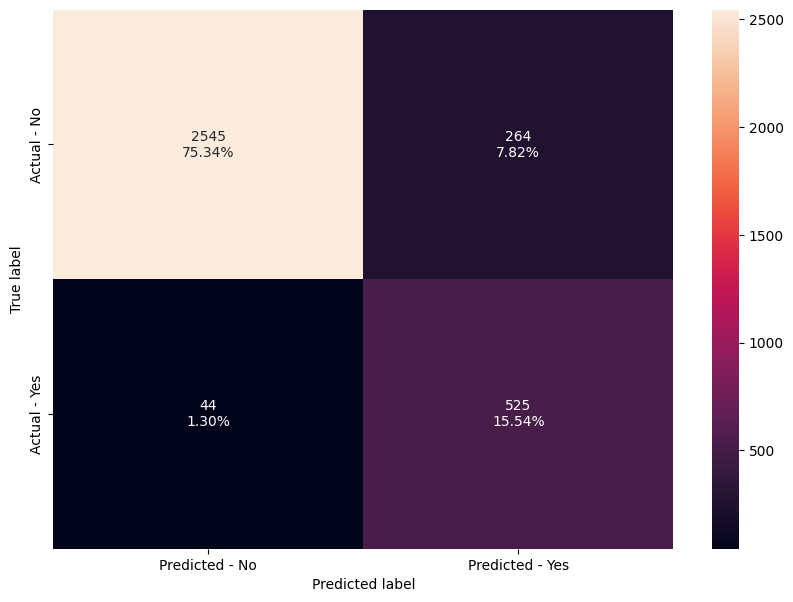

In [ ]:
# Calculating different metrics
get_metrics_score(tuned_bag2,X_train_un,X_test,y_train_un,y_test)

# Creating confusion matrix
make_confusion_matrix(tuned_bag2, y_test)

**Observations:**
* Similar to the RandomForest model, the Bagging model also exhibited signs of overfitting on the train dataset. The model achieved a perfect recall value of 1.0 on the train data, which suggests that it was able to identify all instances of churn in the training set. However, on the test data, the model's recall value was slightly lower at 0.921.


## Model Performance Comparison and Choosing the Final Model

In [ ]:
# defining list of model
models = [xgb2, tuned_rf2, tuned_bag2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model,X_train,X_test,y_train,y_test,False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])




comparison_frame = pd.DataFrame(
    {
        "Model": [
            "XGBoost with Oversampling",
            "Random Forest with Undersampled Data",
            "Bagging with Undersampled Data"
        ],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
    }
)

# Sorting models in decreasing order of test recall
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,XGBoost with Oversampling,0.840650,0.803138,1.000000,0.984183,0.513744,0.460526
1,Random Forest with Undersampled Data,0.937706,0.902605,0.999246,0.906854,0.730176,0.651515
2,Bagging with Undersampled Data,0.940370,0.908822,1.000000,0.922671,0.738453,0.665399


# Model Building with PyCaret

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.2 MB/s eta 0:00:00


In [ ]:
!pip install pycaret[analysis]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.4/67.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.9/286.9 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 

In [ ]:
from pycaret.classification import *


In [ ]:
X = data.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Setup the environment
clf1 = setup(train, target = "Churn", ignore_features = ["AccountID"])

,Description,Value
0,Session id,2961
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(9008, 19)"
4,Transformed data shape,"(9008, 28)"
5,Transformed train set shape,"(6305, 28)"
6,Transformed test set shape,"(2703, 28)"
7,Ignore features,1
8,Ordinal features,2
9,Numeric features,12


### EDA with PyCaret

In [ ]:
# eda function
eda()

Output hidden; open in https://colab.research.google.com to view.

## Compare Models

In [ ]:
best_recall_models_top3 = compare_models(sort = 'Recall', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9689,0.9924,0.8362,0.9759,0.9003,0.8821,0.8860,1.6420
xgboost,Extreme Gradient Boosting,0.9550,0.9834,0.8277,0.8983,0.8611,0.8342,0.8356,1.6530
rf,Random Forest Classifier,0.9556,0.9850,0.7844,0.9425,0.8560,0.8300,0.8350,1.6000
lightgbm,Light Gradient Boosting Machine,0.9483,0.9787,0.7816,0.8994,0.8357,0.8052,0.8084,0.8500
dt,Decision Tree Classifier,0.9232,0.8627,0.7713,0.7747,0.7719,0.7258,0.7266,0.5650
nb,Naive Bayes,0.7872,0.7871,0.6290,0.4132,0.4985,0.3707,0.3841,0.3020
gbc,Gradient Boosting Classifier,0.9121,0.9332,0.6148,0.8211,0.7020,0.6517,0.6618,1.5580
qda,Quadratic Discriminant Analysis,0.8454,0.8268,0.5952,0.5398,0.5633,0.4701,0.4728,0.3210
ada,Ada Boost Classifier,0.8948,0.9079,0.5829,0.7382,0.6509,0.5901,0.5961,0.7390
lr,Logistic Regression,0.8837,0.8670,0.4341,0.7795,0.5562,0.4957,0.5245,2.5980


Processing:   0%|          | 0/67 [00:01<?, ?it/s]

In [ ]:
best_recall_models_top3

[ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='sqrt',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2961, verbose=0, warm_start=False),
 XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
             

## ExtraTrees 

### Create ExtraTrees Model

In [ ]:
et = create_model("et")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9556,0.9871,0.7736,0.9535,0.8542,0.8283,0.8346
1,0.9731,0.9899,0.8491,0.9890,0.9137,0.8979,0.9015
2,0.9667,0.9907,0.8208,0.9775,0.8923,0.8728,0.8775
3,0.9731,0.9932,0.8692,0.9688,0.9163,0.9003,0.9021
4,0.9620,0.9899,0.7944,0.9770,0.8763,0.8541,0.8605
5,0.9730,0.9895,0.8491,0.9890,0.9137,0.8978,0.9015
6,0.9762,0.9959,0.8774,0.9789,0.9254,0.9113,0.9132
7,0.9667,0.9959,0.8208,0.9775,0.8923,0.8728,0.8774
8,0.9762,0.9983,0.8585,1.0000,0.9239,0.9098,0.9136


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# dashboard(et, display_format ='inline')

### Tune ExtraTrees Model

In [ ]:
tuned_et_pycaret = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8764,0.9478,0.8679,0.5897,0.7023,0.6278,0.6465
1,0.8796,0.9252,0.7642,0.6136,0.6807,0.6075,0.6131
2,0.8653,0.9341,0.8585,0.5652,0.6816,0.6008,0.6219
3,0.8843,0.9532,0.8411,0.6164,0.7115,0.6413,0.6534
4,0.8859,0.9454,0.8224,0.6241,0.7097,0.6403,0.6498
5,0.9159,0.9590,0.8962,0.6934,0.7819,0.7308,0.7401
6,0.8873,0.9467,0.8585,0.6190,0.7194,0.6512,0.6648
7,0.8857,0.9474,0.8208,0.6214,0.7073,0.6380,0.6475
8,0.9016,0.9574,0.8585,0.6594,0.7459,0.6862,0.6954


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# get predictions on train data
test_predictions = predict_model(tuned_et_pycaret)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9771,0.9943,0.8835,0.9781,0.9284,0.9148,0.9165


In [ ]:
# get predictions on test data
test_predictions = predict_model(tuned_et_pycaret, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9738,0.9953,0.8707,0.9706,0.9179,0.9024,0.9043


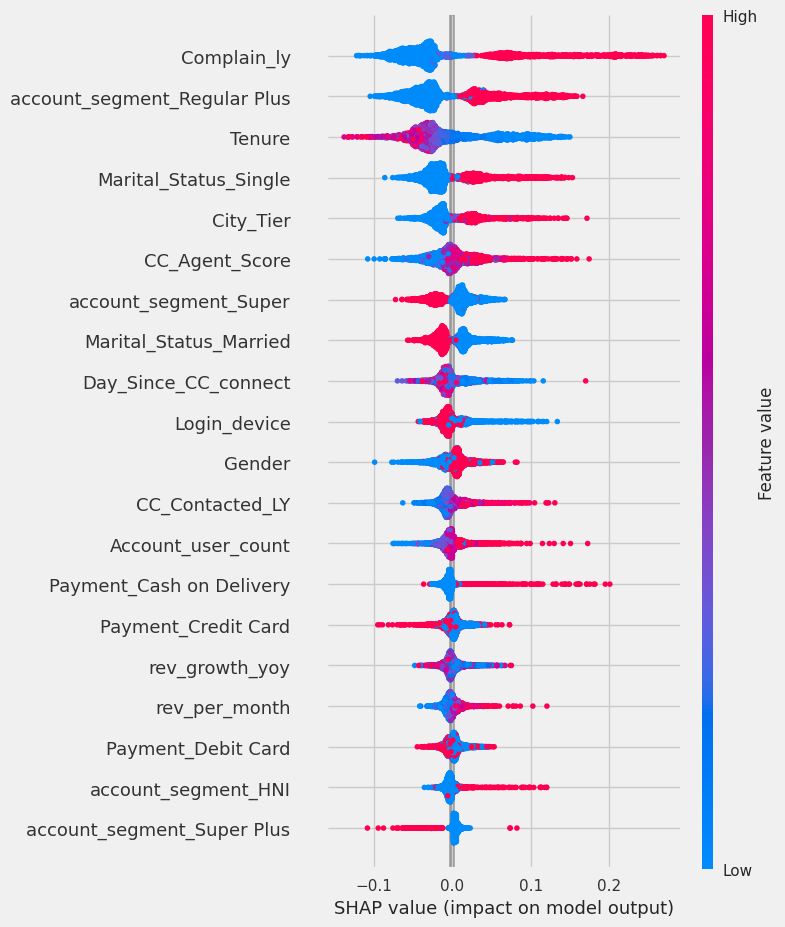

In [ ]:
# interpret summary model
interpret_model(tuned_et_pycaret, plot = 'summary')

**Observations:**
* Tuned Extra Trees Classifier accurately identified 87% of all the accounts which churned.

## XGBoost Model

### Create XGBoost Model

In [ ]:
xgboost = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9350,0.9720,0.7925,0.8155,0.8038,0.7649,0.7650
1,0.9604,0.9815,0.8019,0.9551,0.8718,0.8486,0.8531
2,0.9572,0.9879,0.8679,0.8762,0.8720,0.8463,0.8464
3,0.9477,0.9823,0.7944,0.8854,0.8374,0.8064,0.8081
4,0.9445,0.9815,0.8037,0.8600,0.8309,0.7978,0.7984
5,0.9635,0.9816,0.8491,0.9278,0.8867,0.8650,0.8662
6,0.9651,0.9899,0.8774,0.9118,0.8942,0.8733,0.8736
7,0.9587,0.9887,0.8113,0.9348,0.8687,0.8443,0.8473
8,0.9619,0.9812,0.8585,0.9100,0.8835,0.8607,0.8613


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune XGBoost Model

In [ ]:
tuned_xgboost_pycaret = tune_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9287,0.9692,0.8113,0.7748,0.7926,0.7496,0.7499
1,0.9604,0.9872,0.8679,0.8932,0.8804,0.8566,0.8568
2,0.9493,0.9858,0.8962,0.8190,0.8559,0.8252,0.8264
3,0.9540,0.9866,0.8972,0.8421,0.8688,0.8410,0.8416
4,0.9509,0.9789,0.8785,0.8393,0.8584,0.8287,0.8291
5,0.9603,0.9785,0.8585,0.9010,0.8792,0.8555,0.8559
6,0.9603,0.9870,0.9245,0.8522,0.8869,0.8629,0.8639
7,0.9619,0.9849,0.8962,0.8796,0.8879,0.8649,0.8650
8,0.9587,0.9729,0.8774,0.8774,0.8774,0.8525,0.8525


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# get predictions on train data
train_predictions = predict_model(tuned_xgboost_pycaret)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9652,0.9862,0.8549,0.9329,0.8922,0.8715,0.8727


In [ ]:
# get predictions on test data
test_predictions = predict_model(tuned_xgboost_pycaret, data=test)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9649,0.9851,0.8549,0.9310,0.8913,0.8705,0.8716


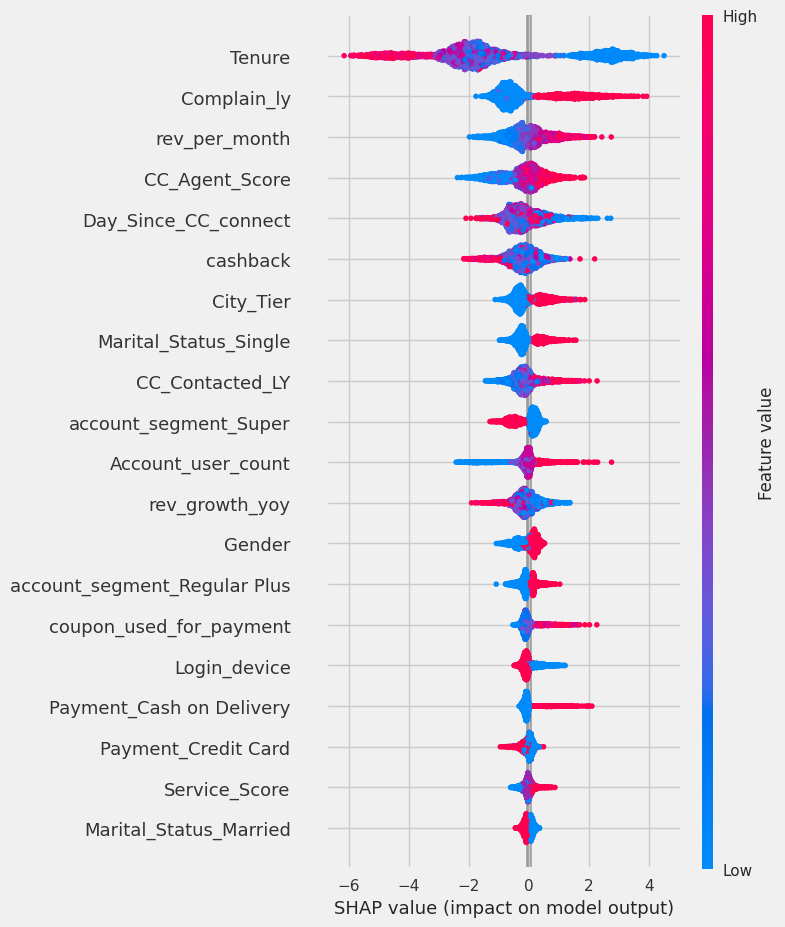

In [ ]:
# interpret summary model
interpret_model(tuned_xgboost_pycaret, plot = 'summary')

In [ ]:
# # dashboard function
# dashboard(tuned_xgboost, display_format ='inline')

**Observations:**
* The XGBoost model tuning performed well, correctly identifying 85% of the churned accounts. 
*Additionally, the model performed consistently on both the train and test datasets, indicating a good generalization performance.

## Light Gradient Boosting Machine

### Create Light Gradient Boosting Machine Model

In [ ]:
lightgbm = create_model("lightgbm")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9303,0.9648,0.7453,0.8229,0.7822,0.7408,0.7421
1,0.9509,0.9765,0.7642,0.9310,0.8394,0.8107,0.8162
2,0.9493,0.9815,0.8208,0.8700,0.8447,0.8144,0.8149
3,0.9477,0.9836,0.7383,0.9405,0.8272,0.7969,0.8050
4,0.9477,0.9761,0.7850,0.8936,0.8358,0.8049,0.8073
5,0.9524,0.9765,0.7925,0.9130,0.8485,0.8204,0.8233
6,0.9603,0.9845,0.8491,0.9091,0.8780,0.8544,0.8551
7,0.9508,0.9830,0.7830,0.9121,0.8426,0.8137,0.8170
8,0.9492,0.9790,0.7925,0.8936,0.8400,0.8099,0.8120


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### Tune Light Gradient Boosting Machine Model

In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9113,0.9449,0.7075,0.7500,0.7282,0.6752,0.6756
1,0.9334,0.9563,0.6887,0.8902,0.7766,0.7382,0.7466
2,0.9287,0.9644,0.7547,0.8081,0.7805,0.7380,0.7386
3,0.9366,0.9672,0.7477,0.8602,0.8000,0.7626,0.7652
4,0.9429,0.9673,0.7664,0.8817,0.8200,0.7863,0.7890
5,0.9349,0.9625,0.7453,0.8495,0.7940,0.7555,0.7578
6,0.9444,0.9719,0.8113,0.8515,0.8309,0.7977,0.7980
7,0.9381,0.9547,0.7170,0.8941,0.7958,0.7598,0.7663
8,0.9270,0.9681,0.6887,0.8488,0.7604,0.7179,0.7234


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# get predictions on ttrain data
test_predictions = predict_model(tuned_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9482,0.9759,0.7824,0.8967,0.8357,0.8051,0.8077


In [ ]:
# get predictions on test data
predictions = predict_model(tuned_lightgbm, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9552,0.9769,0.8100,0.9137,0.8587,0.8322,0.8343


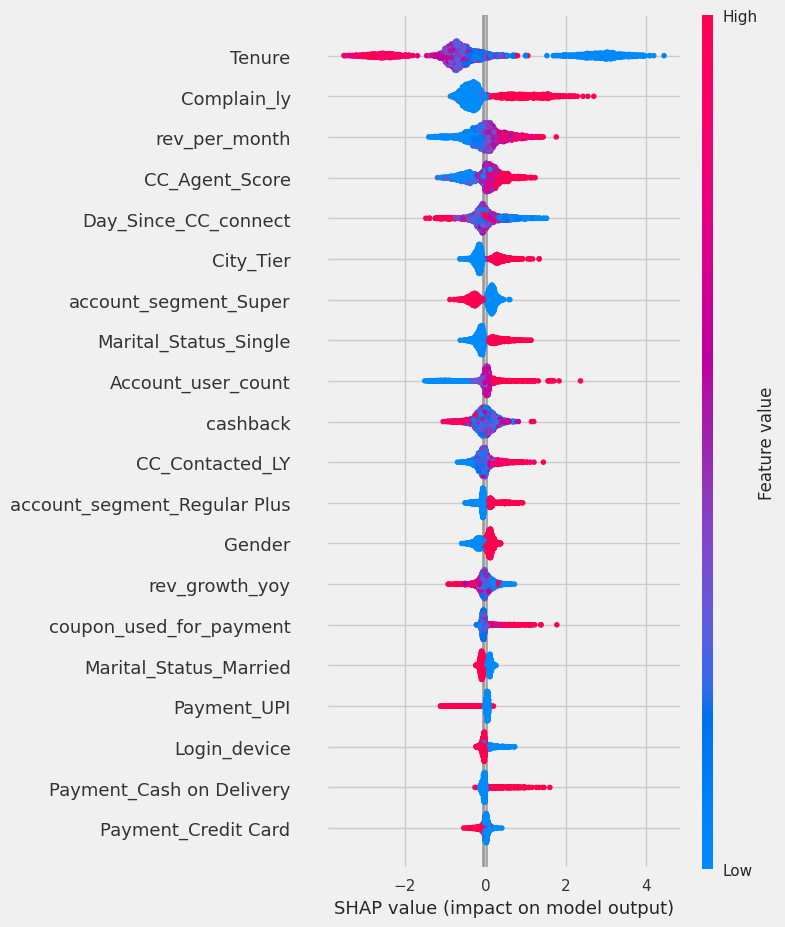

In [ ]:
# interpret summary model
interpret_model(tuned_lightgbm, plot = 'summary')

**Observations:**
* The Light Gradient Boosting Machine had a recall of 0.81.
* There was not a significant difference in the recall on the test and train data which suggests that the model generalizes well enough.

## Blend the Best Three Models

In [ ]:
# blend top 3 models
blend_pycaret = blend_models(best_recall_models_top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9509,0.9860,0.8208,0.8788,0.8488,0.8195,0.8202
1,0.9651,0.9895,0.8113,0.9773,0.8866,0.8662,0.8714
2,0.9731,0.9934,0.8774,0.9588,0.9163,0.9002,0.9015
3,0.9588,0.9918,0.8224,0.9263,0.8713,0.8469,0.8490
4,0.9604,0.9904,0.8131,0.9457,0.8744,0.8510,0.8544
5,0.9635,0.9863,0.8396,0.9368,0.8856,0.8639,0.8658
6,0.9810,0.9943,0.8962,0.9896,0.9406,0.9293,0.9309
7,0.9698,0.9951,0.8396,0.9780,0.9036,0.8858,0.8894
8,0.9714,0.9959,0.8491,0.9783,0.9091,0.8922,0.8954


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
tuned_blend = tune_model(blend_pycaret)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9540,0.9892,0.7830,0.9326,0.8513,0.8243,0.8288
1,0.9699,0.9916,0.8396,0.9780,0.9036,0.8858,0.8895
2,0.9746,0.9934,0.8679,0.9787,0.9200,0.9050,0.9073
3,0.9683,0.9937,0.8598,0.9485,0.9020,0.8831,0.8846
4,0.9635,0.9926,0.8037,0.9773,0.8821,0.8607,0.8665
5,0.9778,0.9893,0.8774,0.9894,0.9300,0.9168,0.9192
6,0.9778,0.9962,0.8774,0.9894,0.9300,0.9168,0.9192
7,0.9698,0.9961,0.8302,0.9888,0.9026,0.8849,0.8896
8,0.9762,0.9982,0.8585,1.0000,0.9239,0.9098,0.9136


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# get predictions on train data
predictions = predict_model(tuned_blend)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9767,0.9950,0.8703,0.9900,0.9263,0.9125,0.9152


In [ ]:
# get predictions on test data
predictions = predict_model(tuned_blend, data=test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9756,0.9966,0.8734,0.9793,0.9233,0.9088,0.9109


# Model Performance Comparision and Choosing the Final Model

# Business Insights and Conclusions

* The XGBoost model trained undersampled data demonstrated the highest performance in predicting accounts that are at risk of churning. The model achieved a perfect fit on the training data for recall, while also avoiding overfitting. On the test data, the model attained a recall score of 0.98, indicating strong predictive accuracy.

* Direct-to-home (DTH) service providers can utilize predictive models to target accounts that are at risk of churning. By offering incentives, they can encourage customers to remain with the service.

* The results of the predictive model support the findings of the exploratory data analysis, which revealed that account tenure, account segments, payment and complaints are the most significant predictors of churn.
  * **Tenure** - Accounts with short tenure were more likely to churn. The longer the account was with Direct to Home, the less likely it will churn.
  * **Complaints** - Accounts that filed complaints with customer service were more likely to churn than those which did not.
  * **Account segments** - Accounts categorized as "Super Plus" were unlikely to churn.
  * **Payment** - Payment with UPI was an important predictor of churn.